In [89]:
#!pip freeze
#!pip install pytest-warnings==0.3.1
#!pip install numpy==1.26.2
#!pip install pandas==2.1.3
#!pip install matplotlib==3.8.2
#!pip install seaborn==0.13.0
#!pip install scikit-learn==3.2.0


In [1]:
#import the warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## Step 1: Importing and Inspecting Dataset

In [3]:
housing = pd.read_csv("train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
housing.shape

(1460, 81)

In [5]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
housing.isnull().sum()/housing.shape[0]

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.597260
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [16]:
#check missing percentage
percent_missing = (housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

## Step2: Data Cleaning

In [19]:
cols = ['Alley','BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2','FireplaceQu',
        'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
for i in cols:
    housing[i].fillna("None",inplace = True)

In [20]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
#Import Visualization libs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

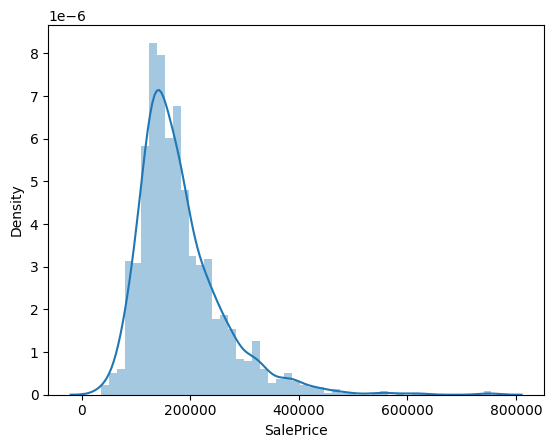

In [25]:
# checking if the target variable salePrice is normally distributed
sns.distplot(housing['SalePrice'])
plt.show()

#### We can see that the target vriable SalePrice is right skewed

In [27]:
print("Skewness: ", housing['SalePrice'].skew())
print("Kurtosis: ", housing['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


#### We can observe that target variable has skewness greater than 1 and has hog density around saleprice of 160000
#### Hence we can do data transformation for this variable 

In [29]:
#Log Transformation
housing['SalePrice'] = np.log(housing["SalePrice"])

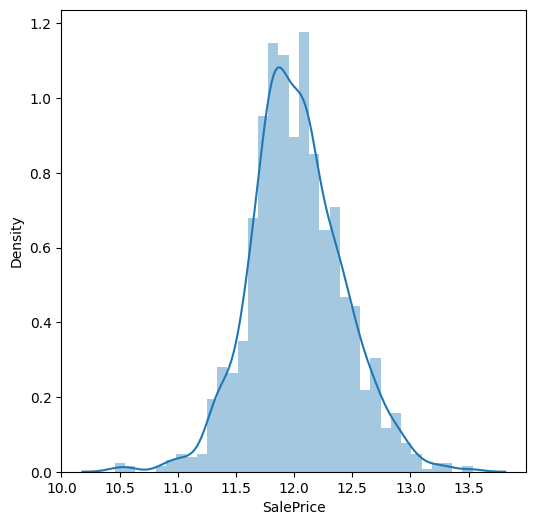

In [30]:
# checking if the target variable salePrice after log transformation
plt.figure(figsize=[6,6])
sns.distplot(housing['SalePrice'])
plt.show() 

In [31]:
print("Skewness: ", housing['SalePrice'].skew())
print("Kurtosis: ", housing['SalePrice'].kurt())

Skewness:  0.12133506220520406
Kurtosis:  0.8095319958036296


#### We can now see a normal distribution curve and skewness & kurtosis are reduced

- Drop ID Column
- Convert 'MSSubClass', 'OverallQual', 'OverallCond' to object datatype 
- Convert 'LotFrontage', 'MasVnrArea', to numerical data

In [33]:
housing.drop("Id", axis=1,inplace = True)

In [35]:
housing[[ 'MSSubClass', 'OverallQual', 'OverallCond']] = housing[[ 'MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [36]:
housing['LotFrontage'] = pd.to_numeric(housing['LotFrontage'], errors ='coerce')
housing['MasVnrArea'] = pd.to_numeric(housing['MasVnrArea'], errors ='coerce')

In [37]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [39]:
null_cols = housing.columns[housing.isnull().any()]
null_cols

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [40]:
for i in null_cols:
    if housing[i].dtype == np.float64 or housing[i].dtype == np.int64:
        housing[i].fillna(housing[i].mean(), inplace = True)
    else:
        housing[i].fillna(housing[i].mode()[0], inplace = True)

In [41]:
housing.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

### Step3: Exploratory Data Analysis on the Dataset

In [51]:
#List of categorical columns
cat_cols = housing.select_dtypes(include = 'object').columns
cat_cols


Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [52]:
#List of Numerical columns
num_cols = housing.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Univariate Analysis

LotFrontage


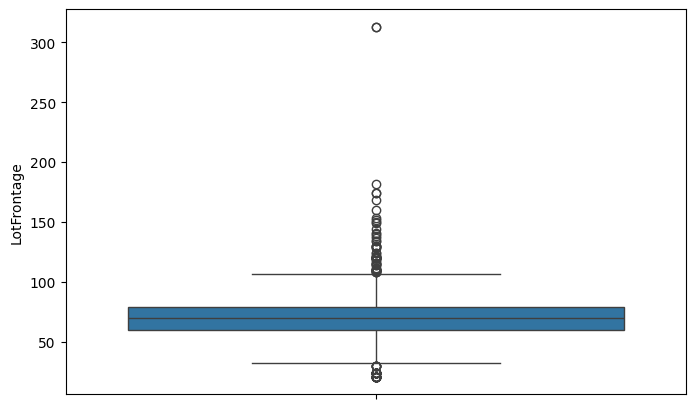

LotArea


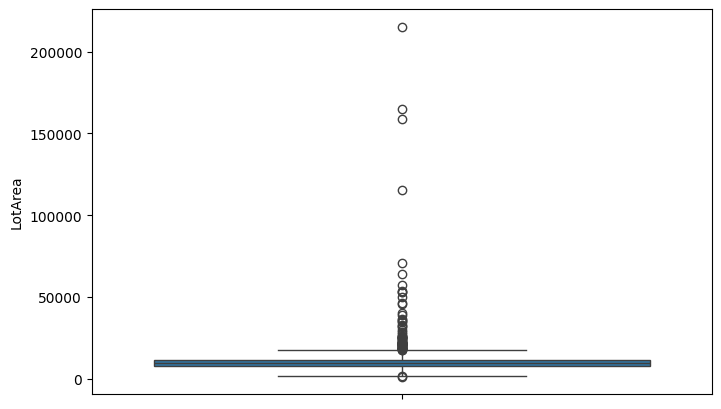

YearBuilt


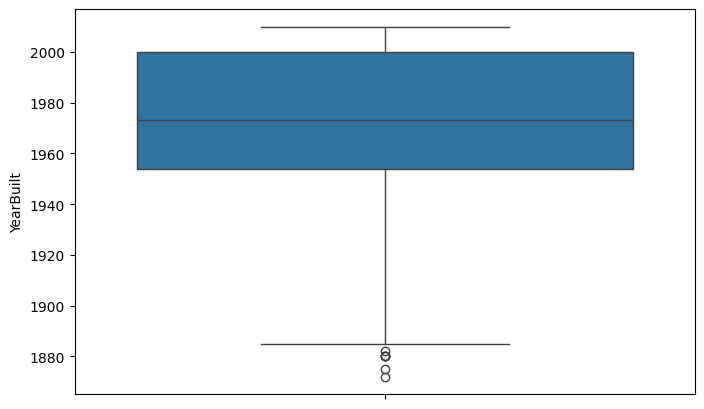

YearRemodAdd


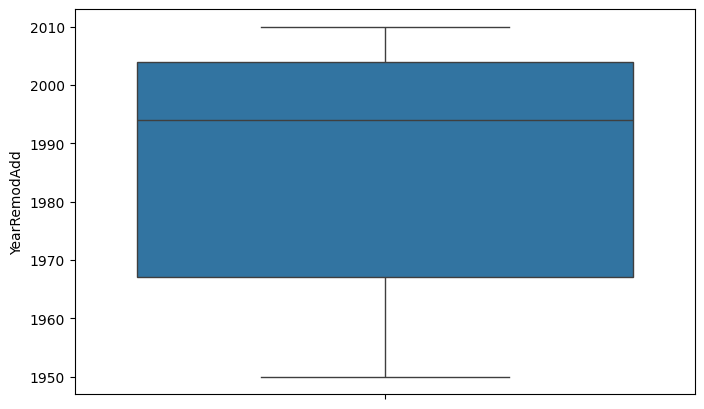

MasVnrArea


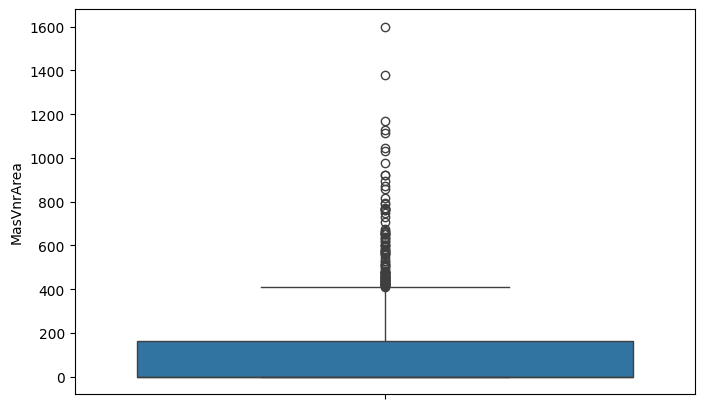

BsmtFinSF1


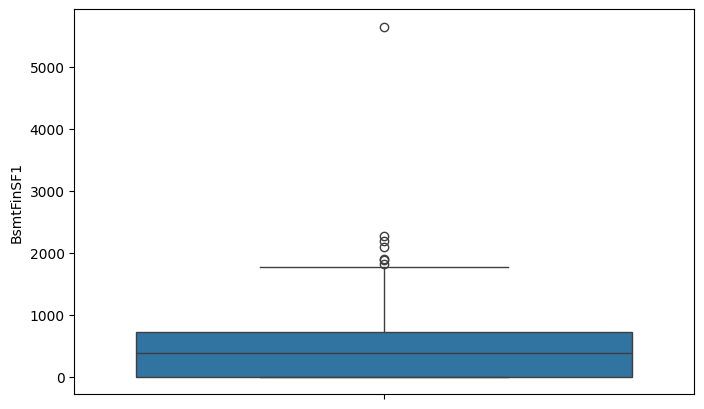

BsmtFinSF2


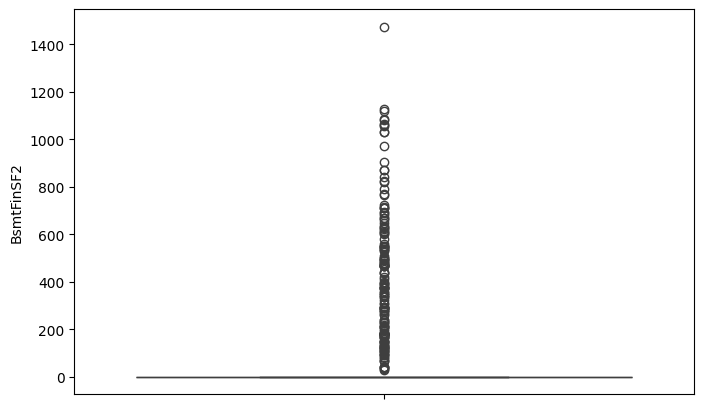

BsmtUnfSF


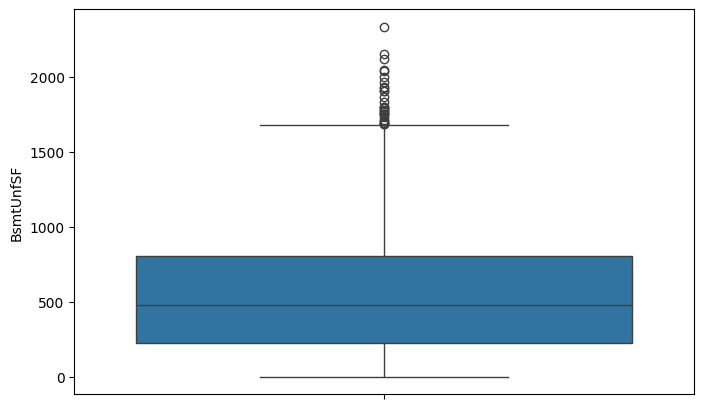

TotalBsmtSF


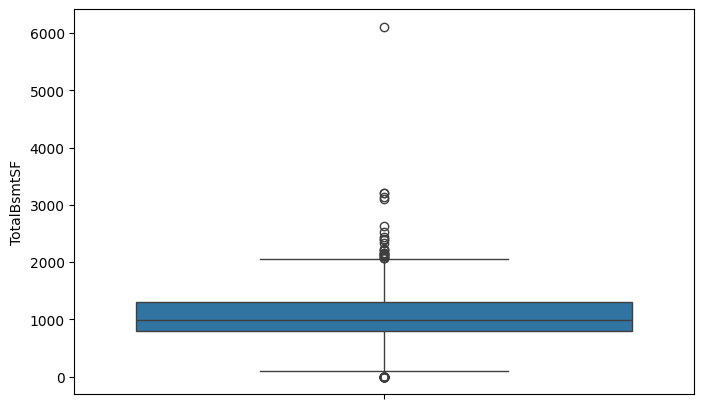

1stFlrSF


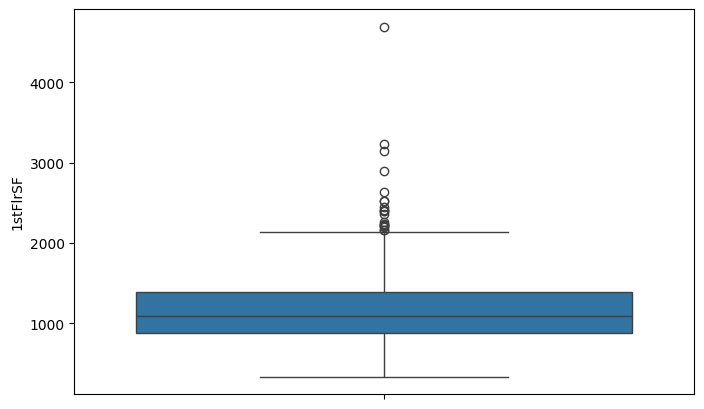

2ndFlrSF


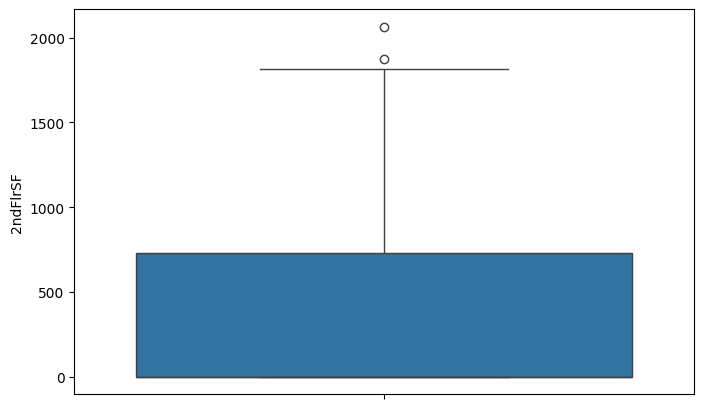

LowQualFinSF


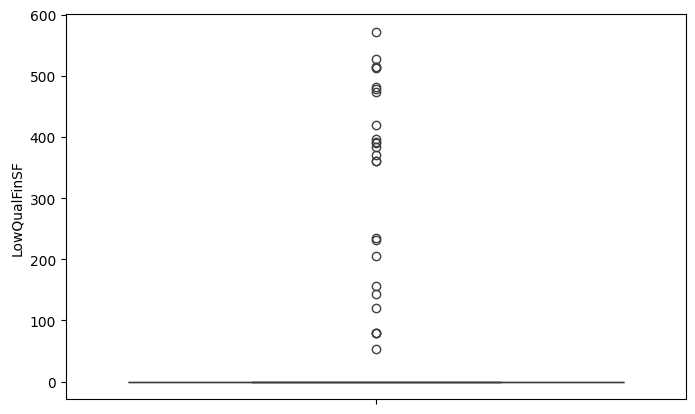

GrLivArea


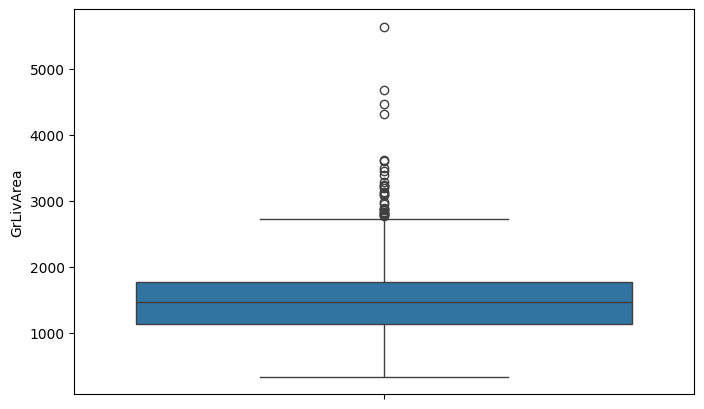

BsmtFullBath


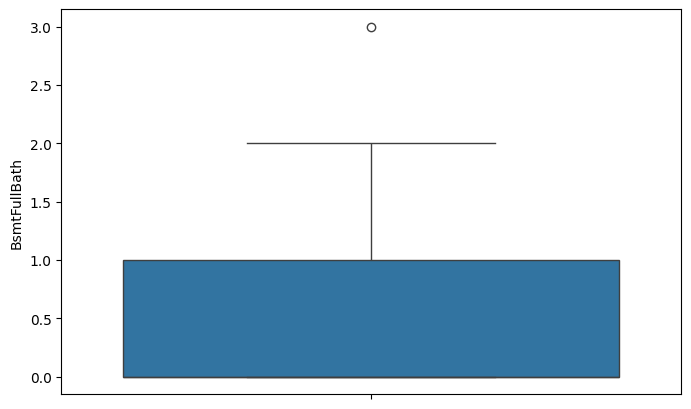

BsmtHalfBath


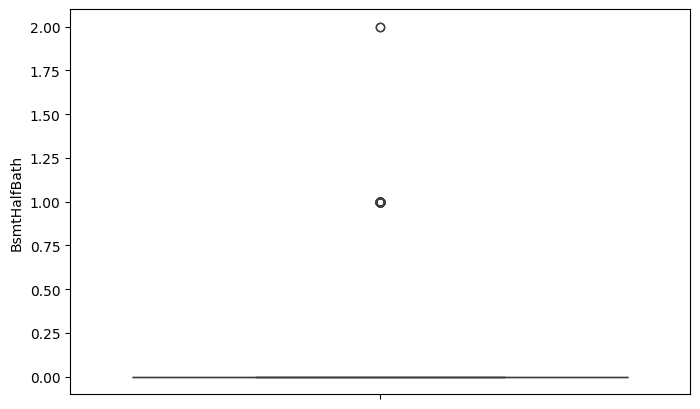

FullBath


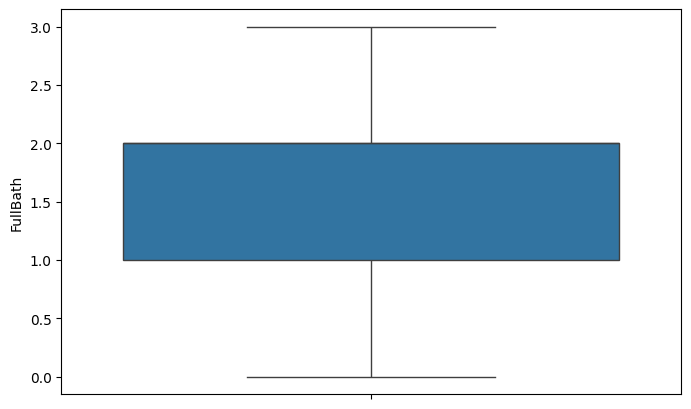

HalfBath


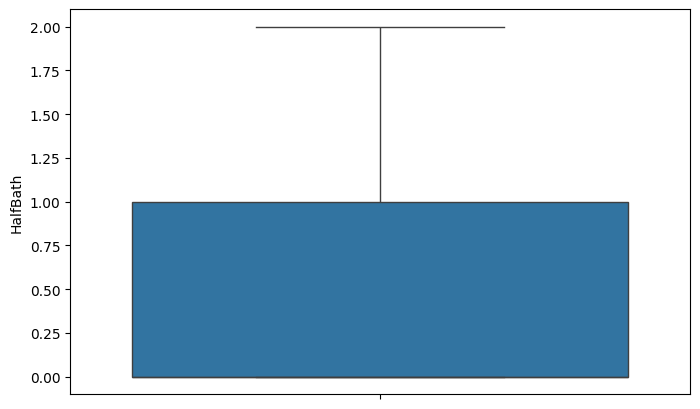

BedroomAbvGr


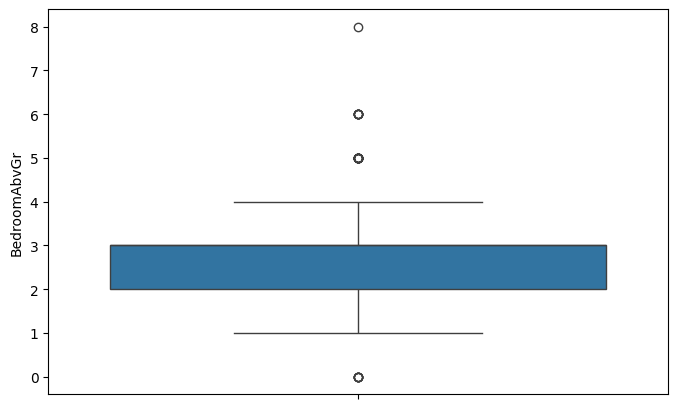

KitchenAbvGr


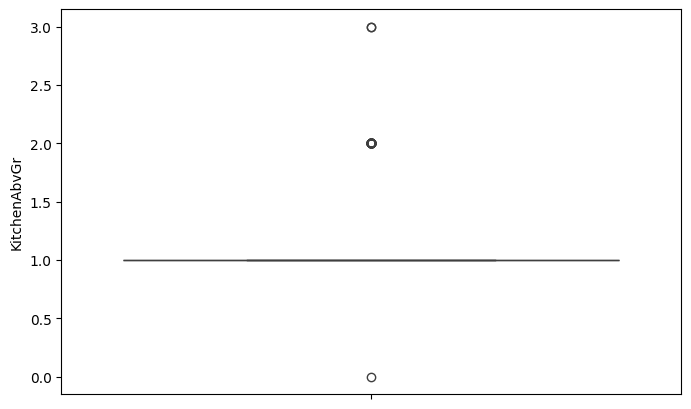

TotRmsAbvGrd


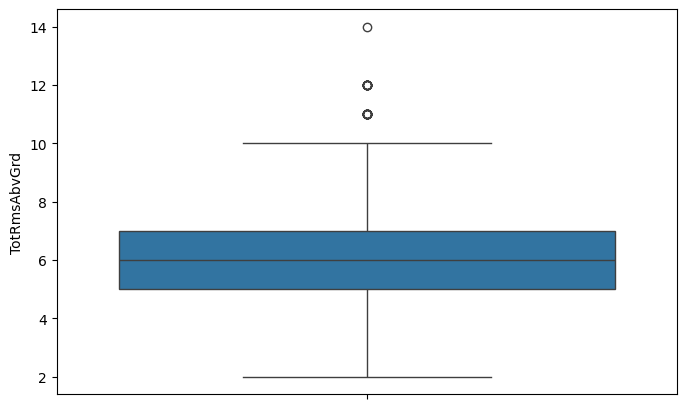

Fireplaces


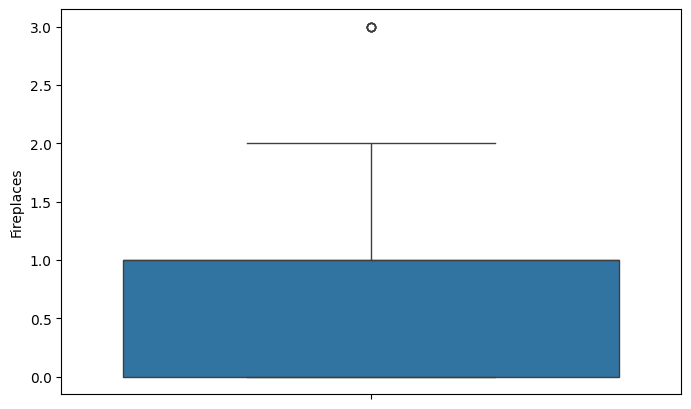

GarageYrBlt


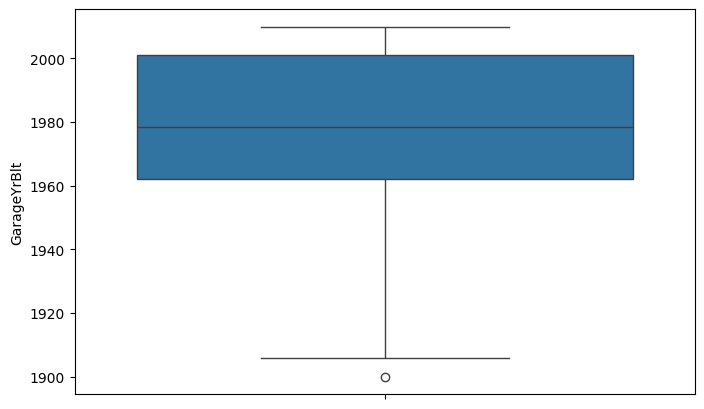

GarageCars


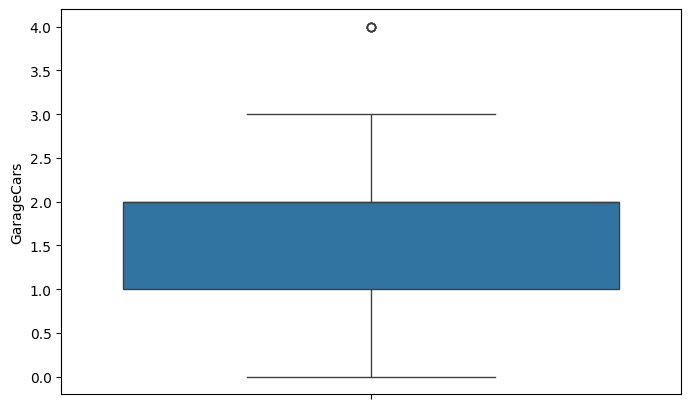

GarageArea


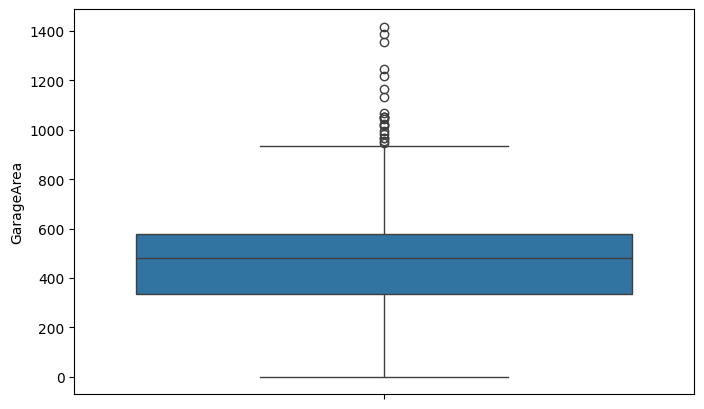

WoodDeckSF


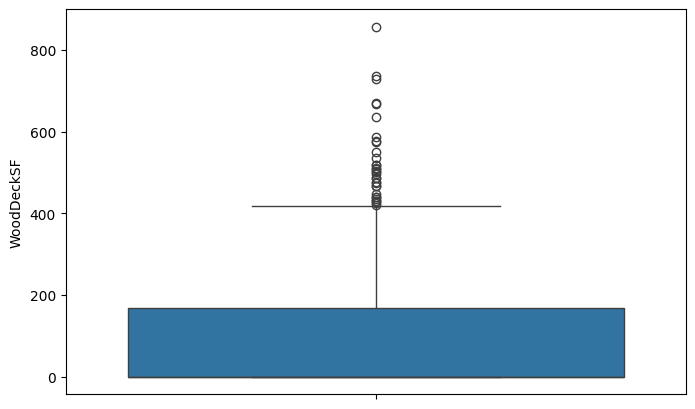

OpenPorchSF


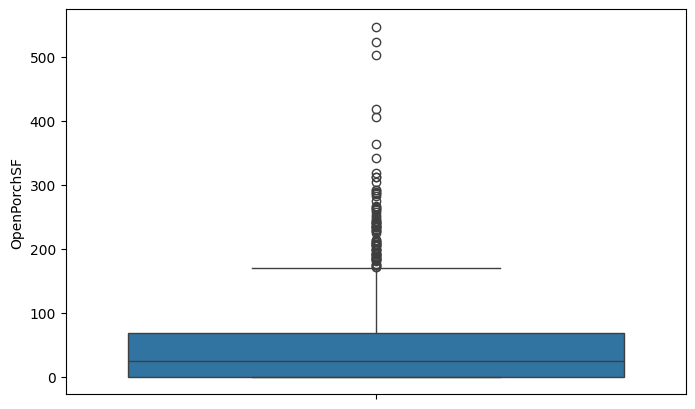

EnclosedPorch


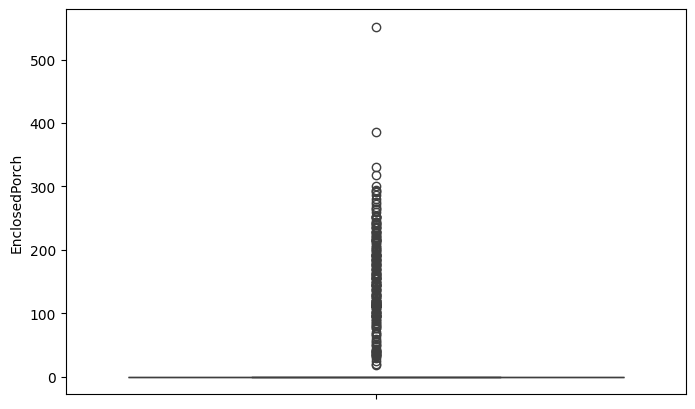

3SsnPorch


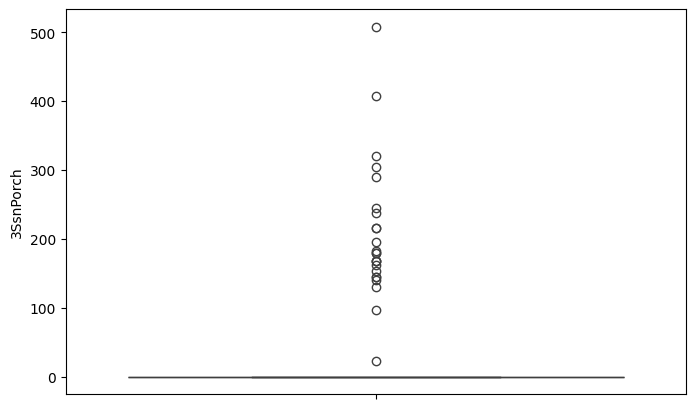

ScreenPorch


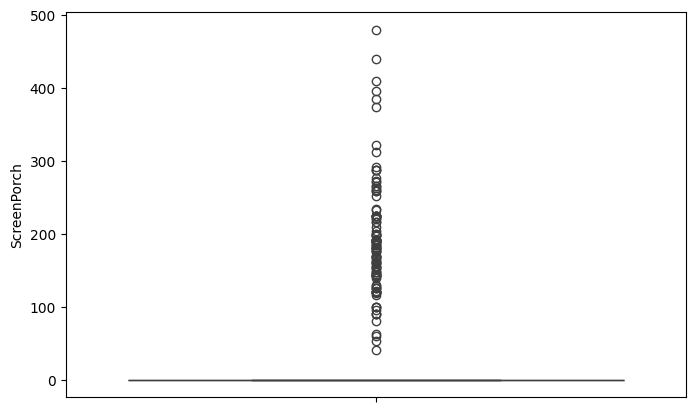

PoolArea


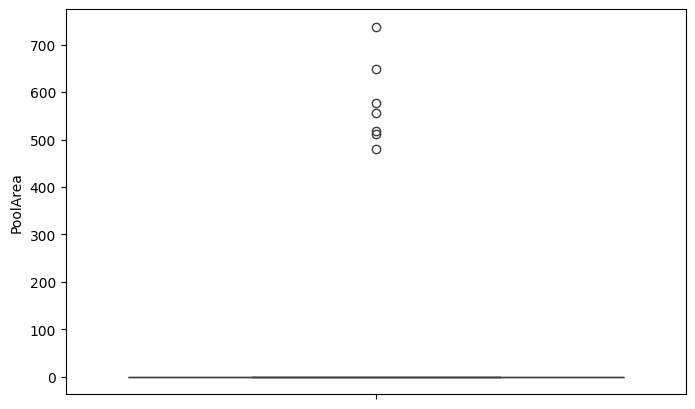

MiscVal


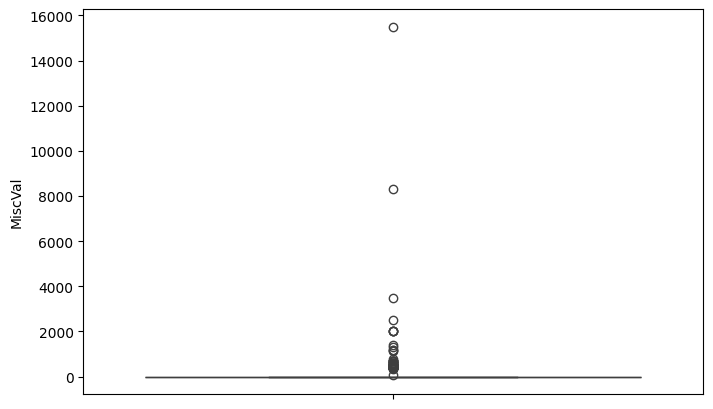

MoSold


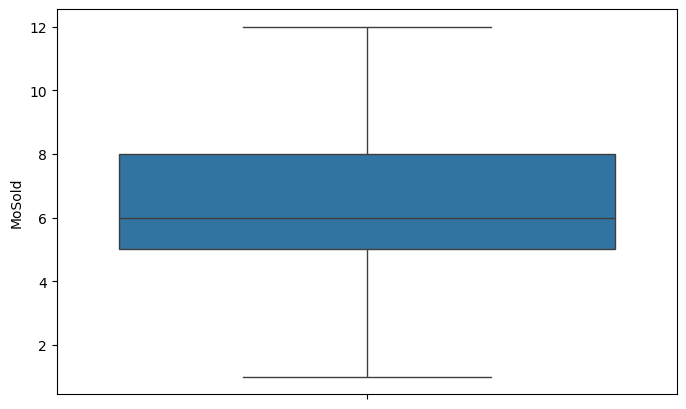

YrSold


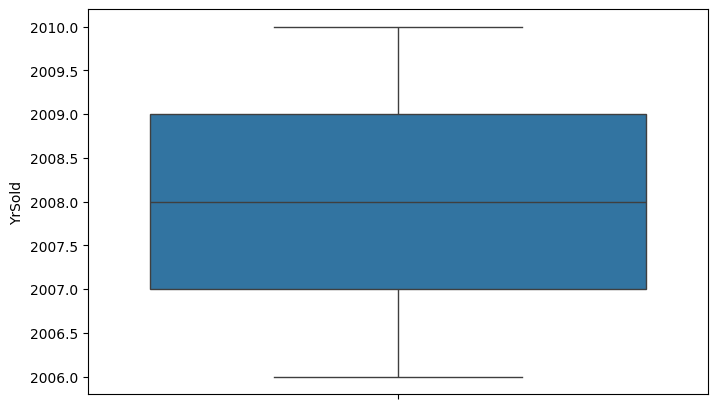

SalePrice


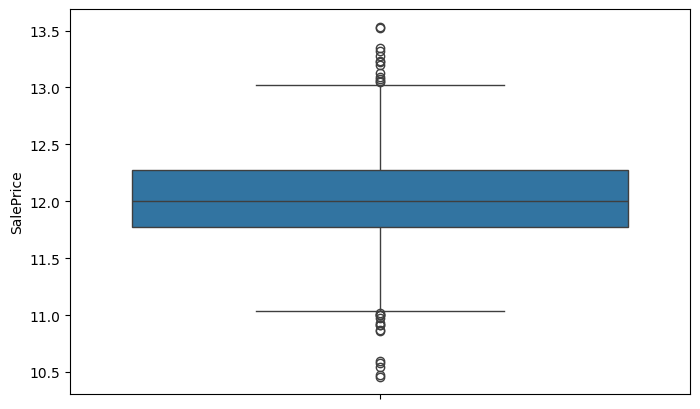

In [56]:
#Numerical Columns
#Plotting box plots to visualize the distribution and check for any outliers 
for i in num_cols:
    plt.figure(figsize=[8,5])
    print(i)
    sns.boxplot(housing[i])
    plt.show()

##### We can see outliers in LotFrontage, LotArea, Yearbuilt, MaxVnrArea, BsmtFinSF1, BsmtUnfSF, etc...

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64


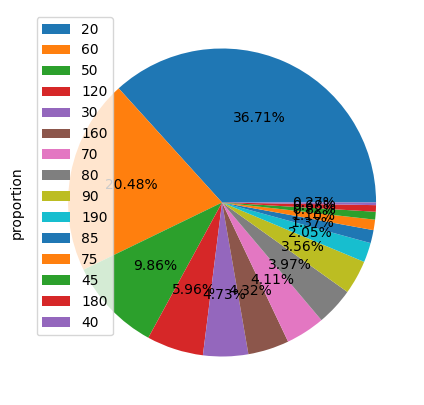

--------------------------------------------------------------------------------------------
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64


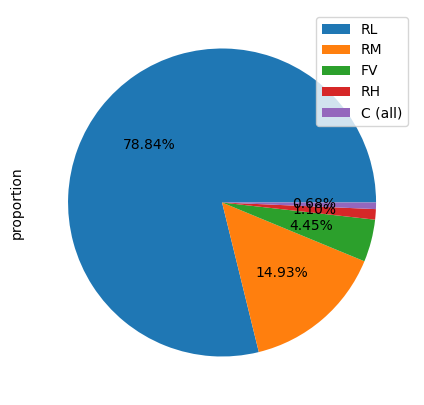

--------------------------------------------------------------------------------------------
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64


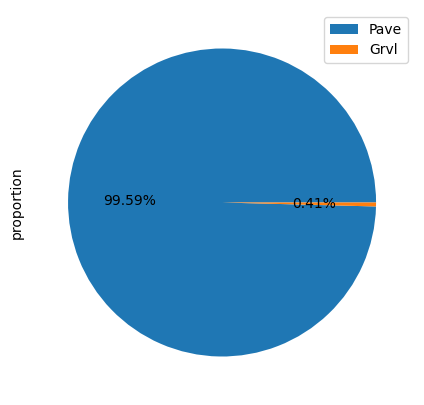

--------------------------------------------------------------------------------------------
Alley
None    0.937671
Grvl    0.034247
Pave    0.028082
Name: proportion, dtype: float64


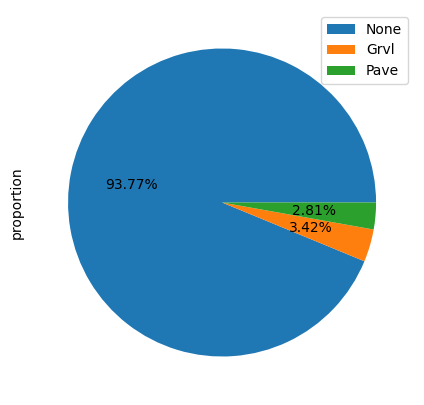

--------------------------------------------------------------------------------------------
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64


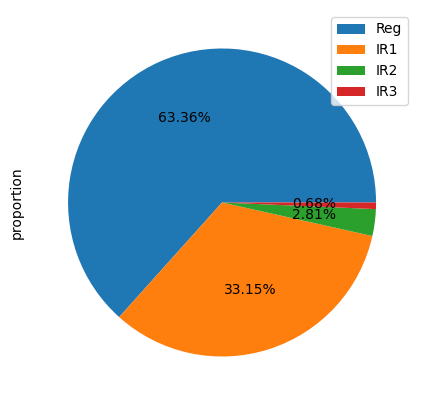

--------------------------------------------------------------------------------------------
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64


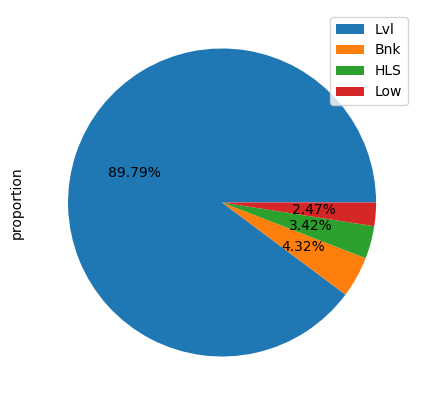

--------------------------------------------------------------------------------------------
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64


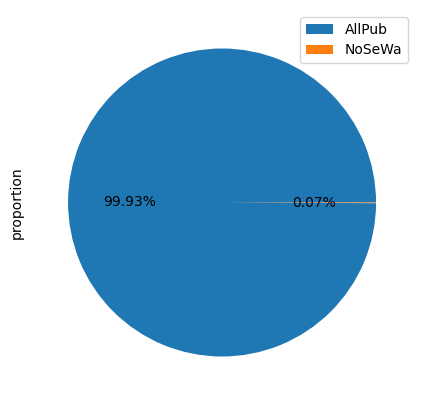

--------------------------------------------------------------------------------------------
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: float64


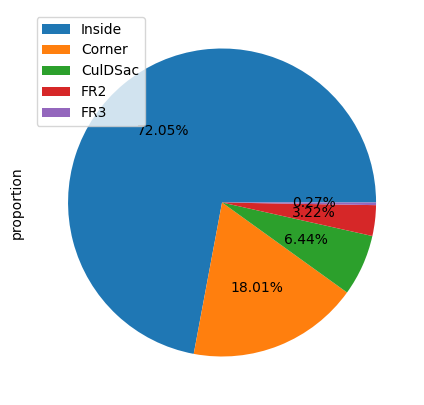

--------------------------------------------------------------------------------------------
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: proportion, dtype: float64


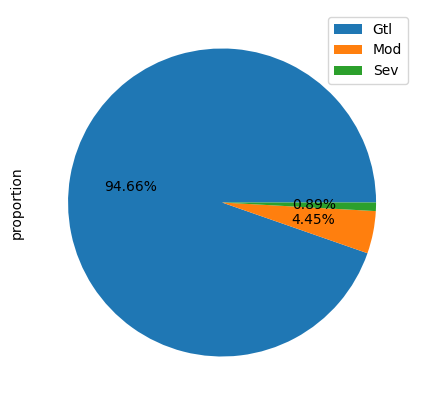

--------------------------------------------------------------------------------------------
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: proportion, dtype: float64


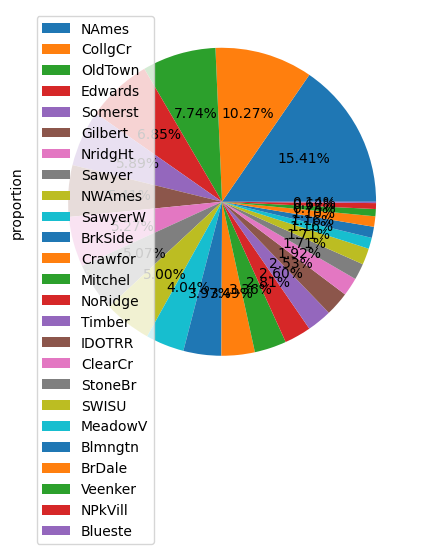

--------------------------------------------------------------------------------------------
Condition1
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: proportion, dtype: float64


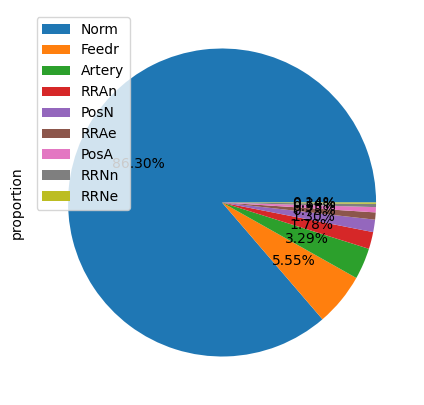

--------------------------------------------------------------------------------------------
Condition2
Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: proportion, dtype: float64


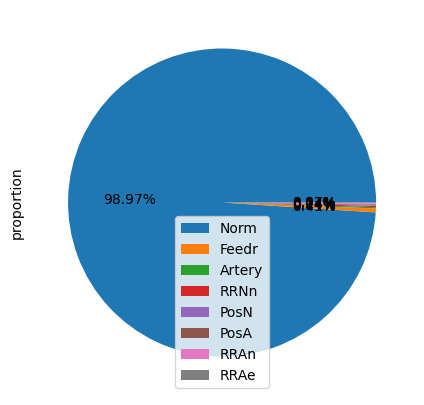

--------------------------------------------------------------------------------------------
BldgType
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: proportion, dtype: float64


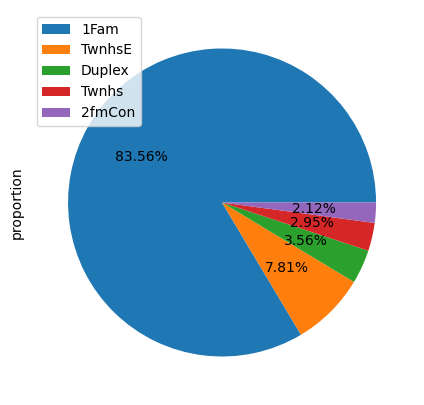

--------------------------------------------------------------------------------------------
HouseStyle
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: proportion, dtype: float64


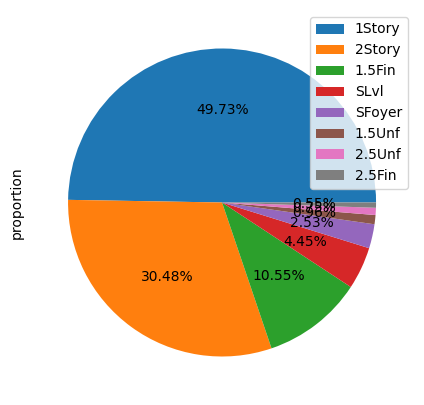

--------------------------------------------------------------------------------------------
OverallQual
5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: proportion, dtype: float64


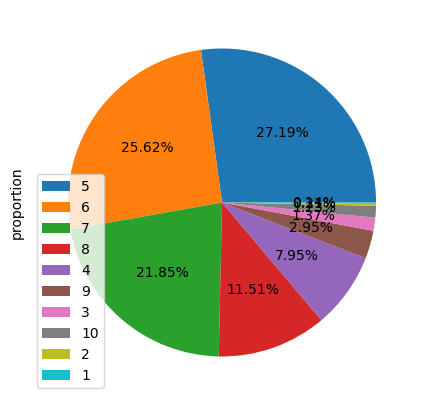

--------------------------------------------------------------------------------------------
OverallCond
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: proportion, dtype: float64


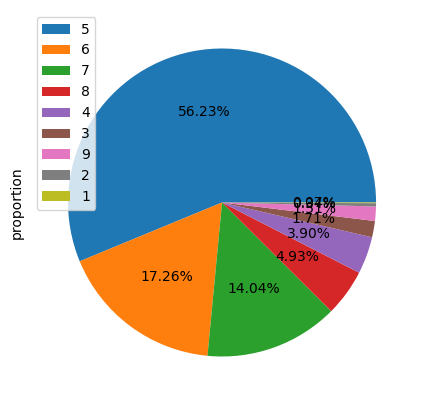

--------------------------------------------------------------------------------------------
RoofStyle
Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: proportion, dtype: float64


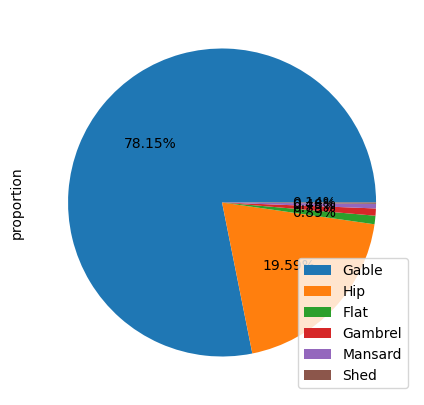

--------------------------------------------------------------------------------------------
RoofMatl
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
Membran    0.000685
Roll       0.000685
ClyTile    0.000685
Name: proportion, dtype: float64


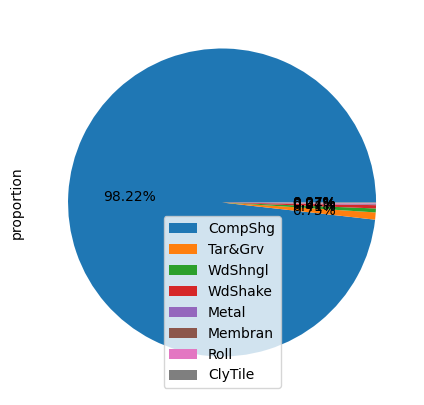

--------------------------------------------------------------------------------------------
Exterior1st
VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: proportion, dtype: float64


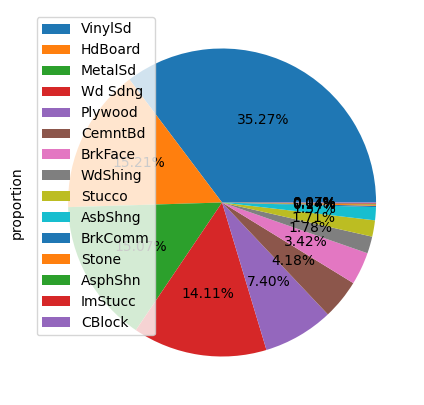

--------------------------------------------------------------------------------------------
Exterior2nd
VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: proportion, dtype: float64


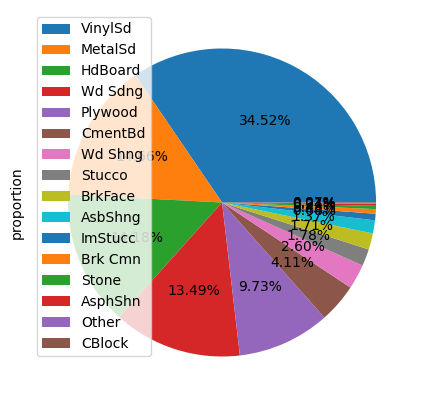

--------------------------------------------------------------------------------------------
MasVnrType
BrkFace    0.902055
Stone      0.087671
BrkCmn     0.010274
Name: proportion, dtype: float64


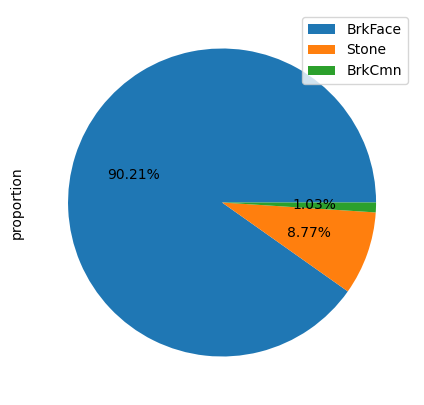

--------------------------------------------------------------------------------------------
ExterQual
TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: proportion, dtype: float64


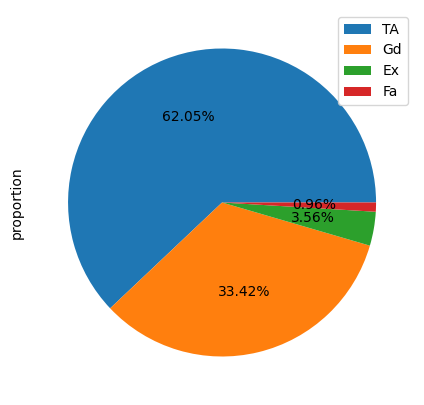

--------------------------------------------------------------------------------------------
ExterCond
TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: proportion, dtype: float64


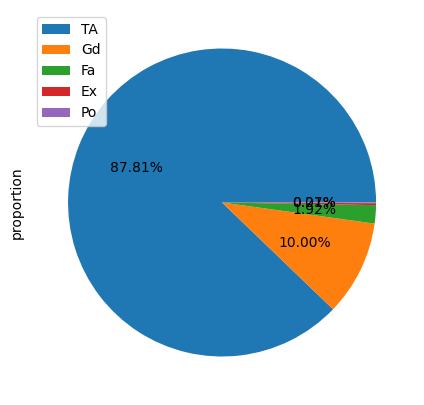

--------------------------------------------------------------------------------------------
Foundation
PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: proportion, dtype: float64


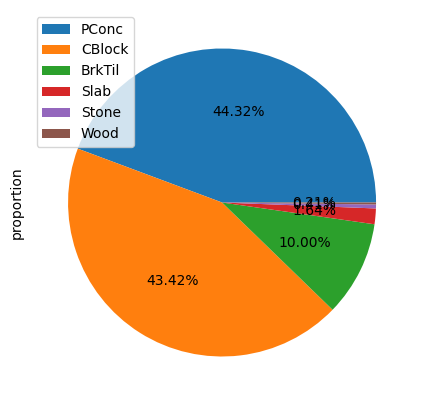

--------------------------------------------------------------------------------------------
BsmtQual
TA      0.444521
Gd      0.423288
Ex      0.082877
None    0.025342
Fa      0.023973
Name: proportion, dtype: float64


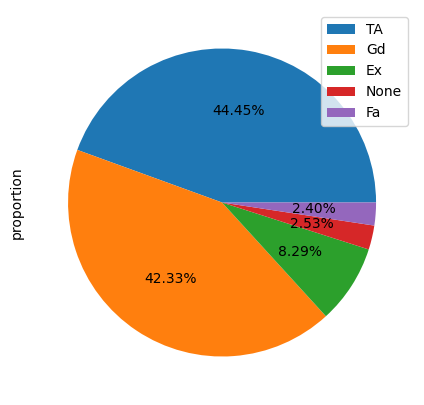

--------------------------------------------------------------------------------------------
BsmtCond
TA      0.897945
Gd      0.044521
Fa      0.030822
None    0.025342
Po      0.001370
Name: proportion, dtype: float64


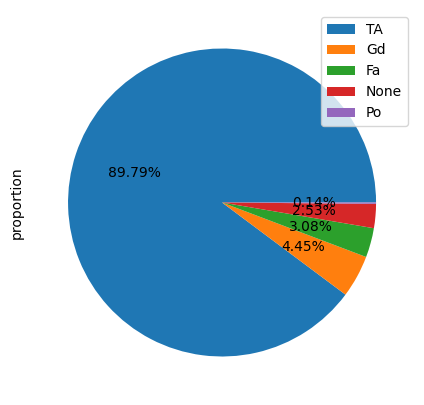

--------------------------------------------------------------------------------------------
BsmtExposure
No      0.652740
Av      0.151370
Gd      0.091781
Mn      0.078082
None    0.026027
Name: proportion, dtype: float64


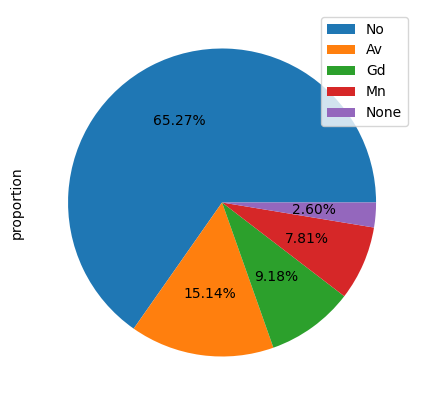

--------------------------------------------------------------------------------------------
BsmtFinType1
Unf     0.294521
GLQ     0.286301
ALQ     0.150685
BLQ     0.101370
Rec     0.091096
LwQ     0.050685
None    0.025342
Name: proportion, dtype: float64


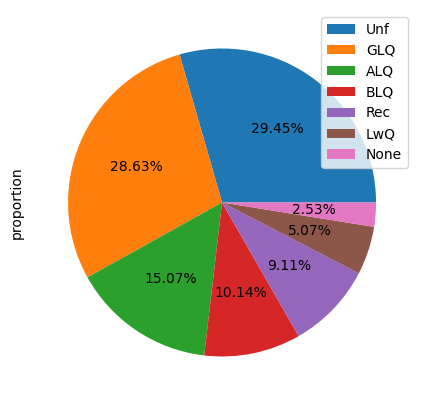

--------------------------------------------------------------------------------------------
BsmtFinType2
Unf     0.860274
Rec     0.036986
LwQ     0.031507
None    0.026027
BLQ     0.022603
ALQ     0.013014
GLQ     0.009589
Name: proportion, dtype: float64


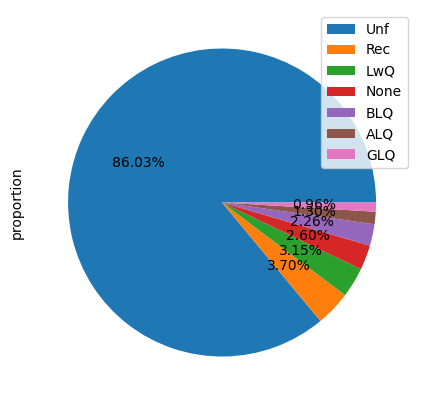

--------------------------------------------------------------------------------------------
Heating
GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: proportion, dtype: float64


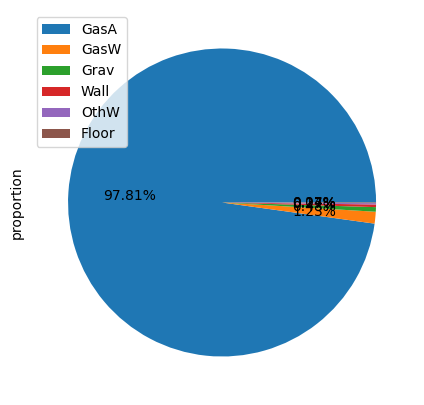

--------------------------------------------------------------------------------------------
HeatingQC
Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: proportion, dtype: float64


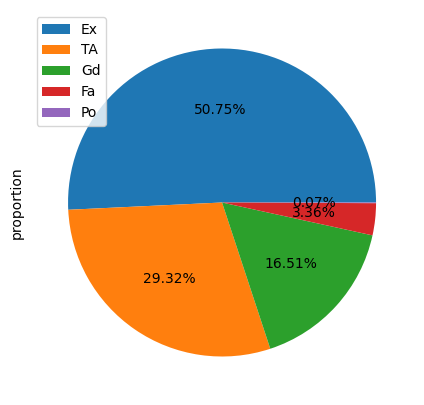

--------------------------------------------------------------------------------------------
CentralAir
Y    0.934932
N    0.065068
Name: proportion, dtype: float64


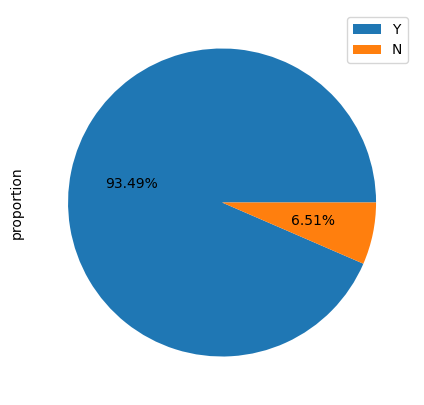

--------------------------------------------------------------------------------------------
Electrical
SBrkr    0.914384
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: proportion, dtype: float64


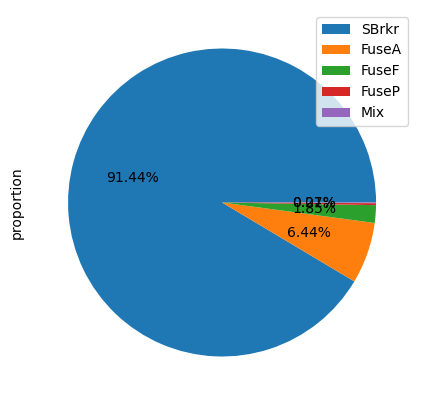

--------------------------------------------------------------------------------------------
KitchenQual
TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: proportion, dtype: float64


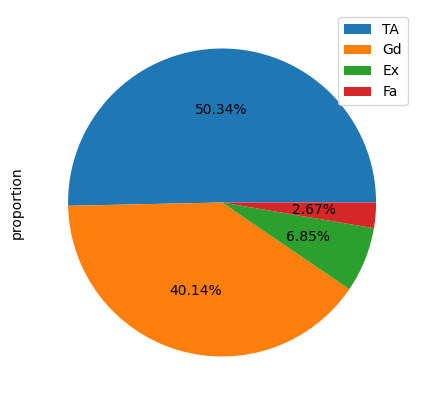

--------------------------------------------------------------------------------------------
Functional
Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: proportion, dtype: float64


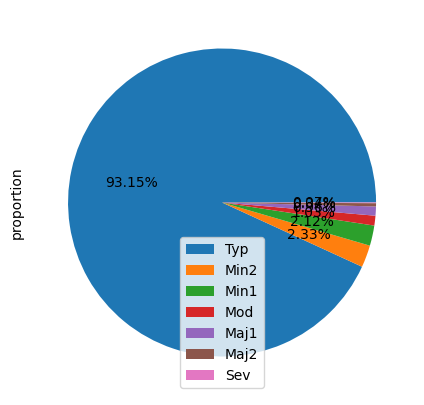

--------------------------------------------------------------------------------------------
FireplaceQu
None    0.472603
Gd      0.260274
TA      0.214384
Fa      0.022603
Ex      0.016438
Po      0.013699
Name: proportion, dtype: float64


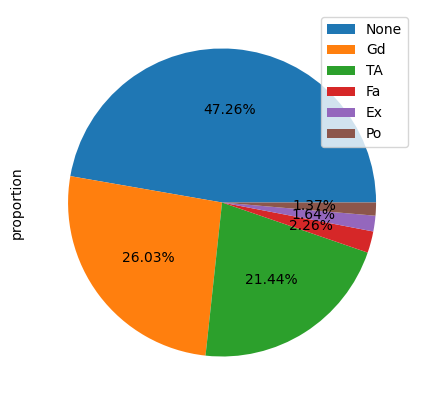

--------------------------------------------------------------------------------------------
GarageType
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
None       0.055479
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: proportion, dtype: float64


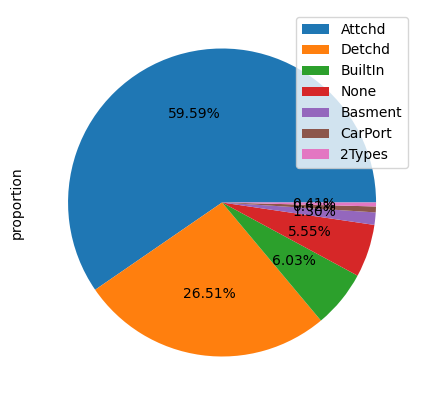

--------------------------------------------------------------------------------------------
GarageFinish
Unf     0.414384
RFn     0.289041
Fin     0.241096
None    0.055479
Name: proportion, dtype: float64


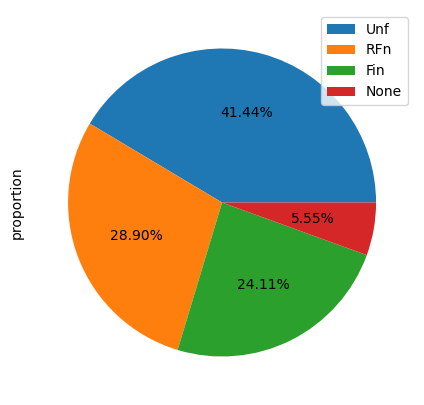

--------------------------------------------------------------------------------------------
GarageQual
TA      0.897945
None    0.055479
Fa      0.032877
Gd      0.009589
Ex      0.002055
Po      0.002055
Name: proportion, dtype: float64


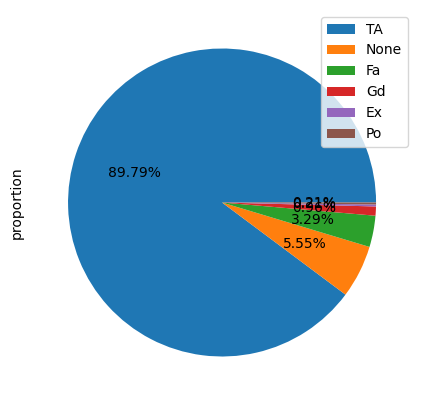

--------------------------------------------------------------------------------------------
GarageCond
TA      0.908219
None    0.055479
Fa      0.023973
Gd      0.006164
Po      0.004795
Ex      0.001370
Name: proportion, dtype: float64


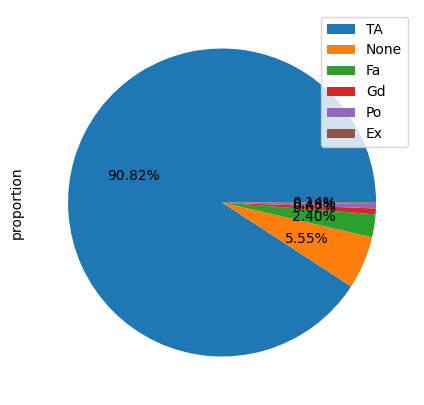

--------------------------------------------------------------------------------------------
PavedDrive
Y    0.917808
N    0.061644
P    0.020548
Name: proportion, dtype: float64


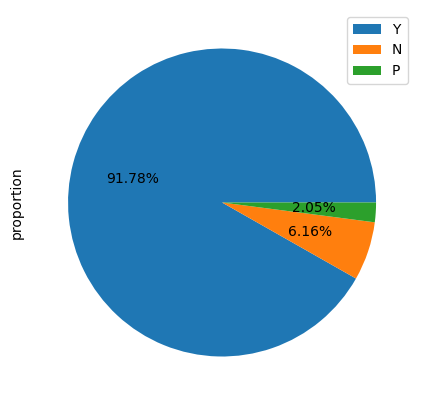

--------------------------------------------------------------------------------------------
PoolQC
None    0.995205
Gd      0.002055
Ex      0.001370
Fa      0.001370
Name: proportion, dtype: float64


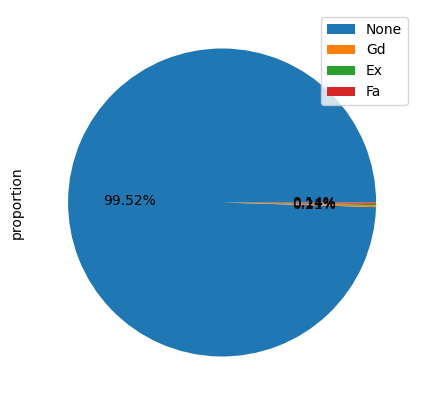

--------------------------------------------------------------------------------------------
Fence
None     0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: proportion, dtype: float64


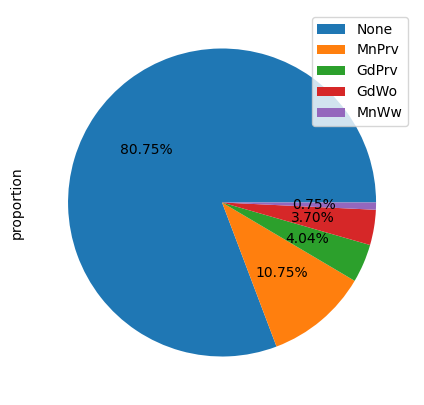

--------------------------------------------------------------------------------------------
MiscFeature
None    0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: proportion, dtype: float64


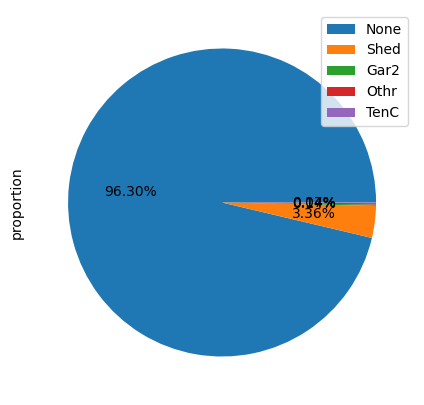

--------------------------------------------------------------------------------------------
SaleType
WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLI    0.003425
ConLw    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: proportion, dtype: float64


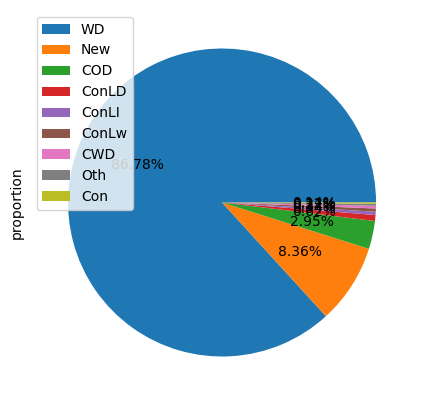

--------------------------------------------------------------------------------------------
SaleCondition
Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: proportion, dtype: float64


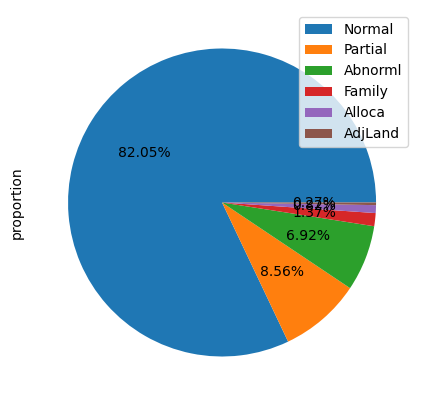

--------------------------------------------------------------------------------------------


In [58]:
#Categorical Columns
#Plotting Pie plos to visualize the values distribution in each category
for i in cat_cols:
    print(housing[i].value_counts(normalize = True))
    plt.figure(figsize=[5,5])
    housing[i].value_counts(normalize=True).plot.pie(labeldistance = None, autopct = '%1.2f%%')
    plt.legend()
    plt.show()
    print("--------------------------------------------------------------------------------------------")

> We can look percentage of valyes in category of columns and infer that, 'MSZoning', 'Street', 'LandContour', 'Utilities' 
> LotConfig, LandSlope, Condition1, Condition2, BlgdType, RoofStyle etc., columns are hving more than 70% of a distribution in a single category

### Bivariate / Multivariate Analysis on the Dataset

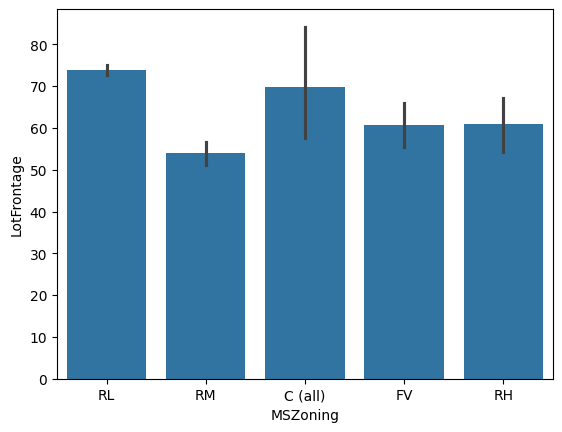

In [60]:
#Plot of MSZoning vs LotFrontage
sns.barplot(x='MSZoning', y='LotFrontage', data=housing)
plt.show()

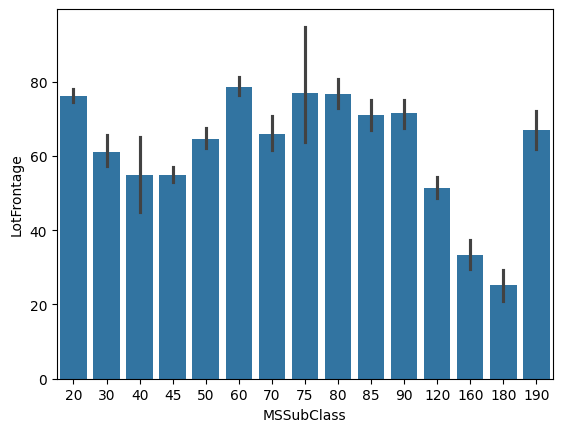

In [61]:
#Plot of MSSubClass vs LotFrontage
sns.barplot(x='MSSubClass', y='LotFrontage', data=housing)
plt.show()

<Axes: xlabel='HouseStyle', ylabel='SalePrice'>

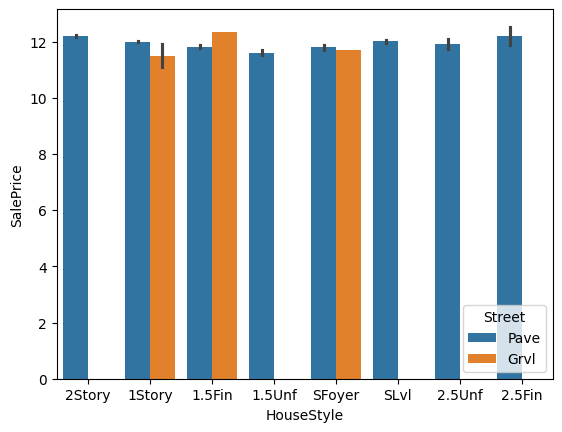

In [62]:
#plot of HouseStyle vs SalePrice based on Street
sns.barplot(x='HouseStyle', y='SalePrice', hue = 'Street', data= housing)


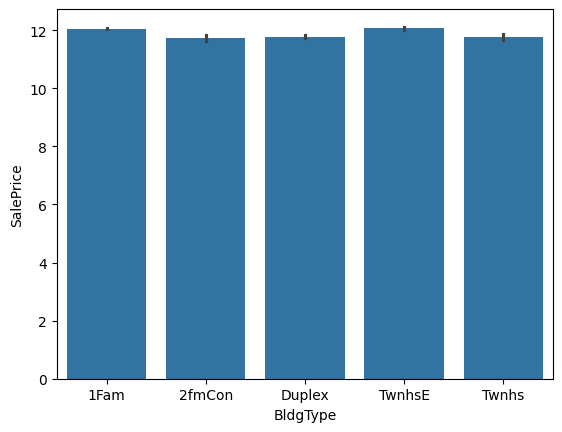

In [65]:
#Plot of BldgType vs SalePrice
sns.barplot(x='BldgType', y='SalePrice', data=housing)
plt.show()

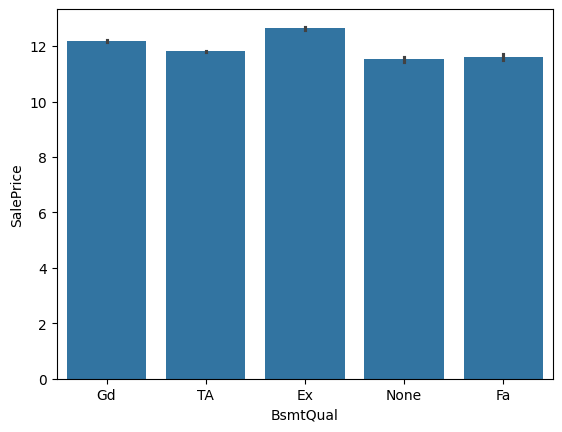

In [66]:
#Plot of BsmtQual vs SalePrice
sns.barplot(x='BsmtQual', y='SalePrice', data=housing)
plt.show()

##### Conclusion:

- We can see that RL (Residential Low Density) has the highest lot frontage and RM(Residential Medum Density) has the least
- We can see that 2-STORY 1946 & NEWER has the highest lot frontage and PUD-MULTILEVEL-INCL SPLIT LEVIFOYER has the least
- The SaleProce is not showing much variance with respect to the Style of dwelling(one story/two story)
- The SalePrice is almost same for all the Building Types(Type of dwelling) and the basement quality, so there is no significant pattem

In [70]:
# Calculating Age of Property
housing['Age'] = housing['YrSold'] - housing['YearBuilt']
housing['Age'].head()

0     5
1    31
2     7
3    91
4     8
Name: Age, dtype: int64

In [71]:
# Dropping YearSold and YearBuilt
housing.drop(columns=['YearBuilt', 'YrSold'], axis=1, inplace=True)

In [72]:
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl   
3         70       RL         60.0     9550   Pave  None      IR1         Lvl   
4         60       RL         84.0    14260   Pave  None      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle OverallQual OverallCond  YearRemodAdd RoofStyle RoofMatl  \
0     2Story           7           5          2003     Gable  CompShg   
1     1Story           6           8          1976     Gable  CompShg   
2     2Story           7           5          2002     Gable  CompShg   
3     2Story           7           5          1970     Gable  CompShg   
4     2Story           8           5          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd    BrkFace         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng    BrkFace         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0        None     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7        Typ           1          Gd     Detchd 

Text(0.5, 1.0, 'Correlation of Numerical Values')

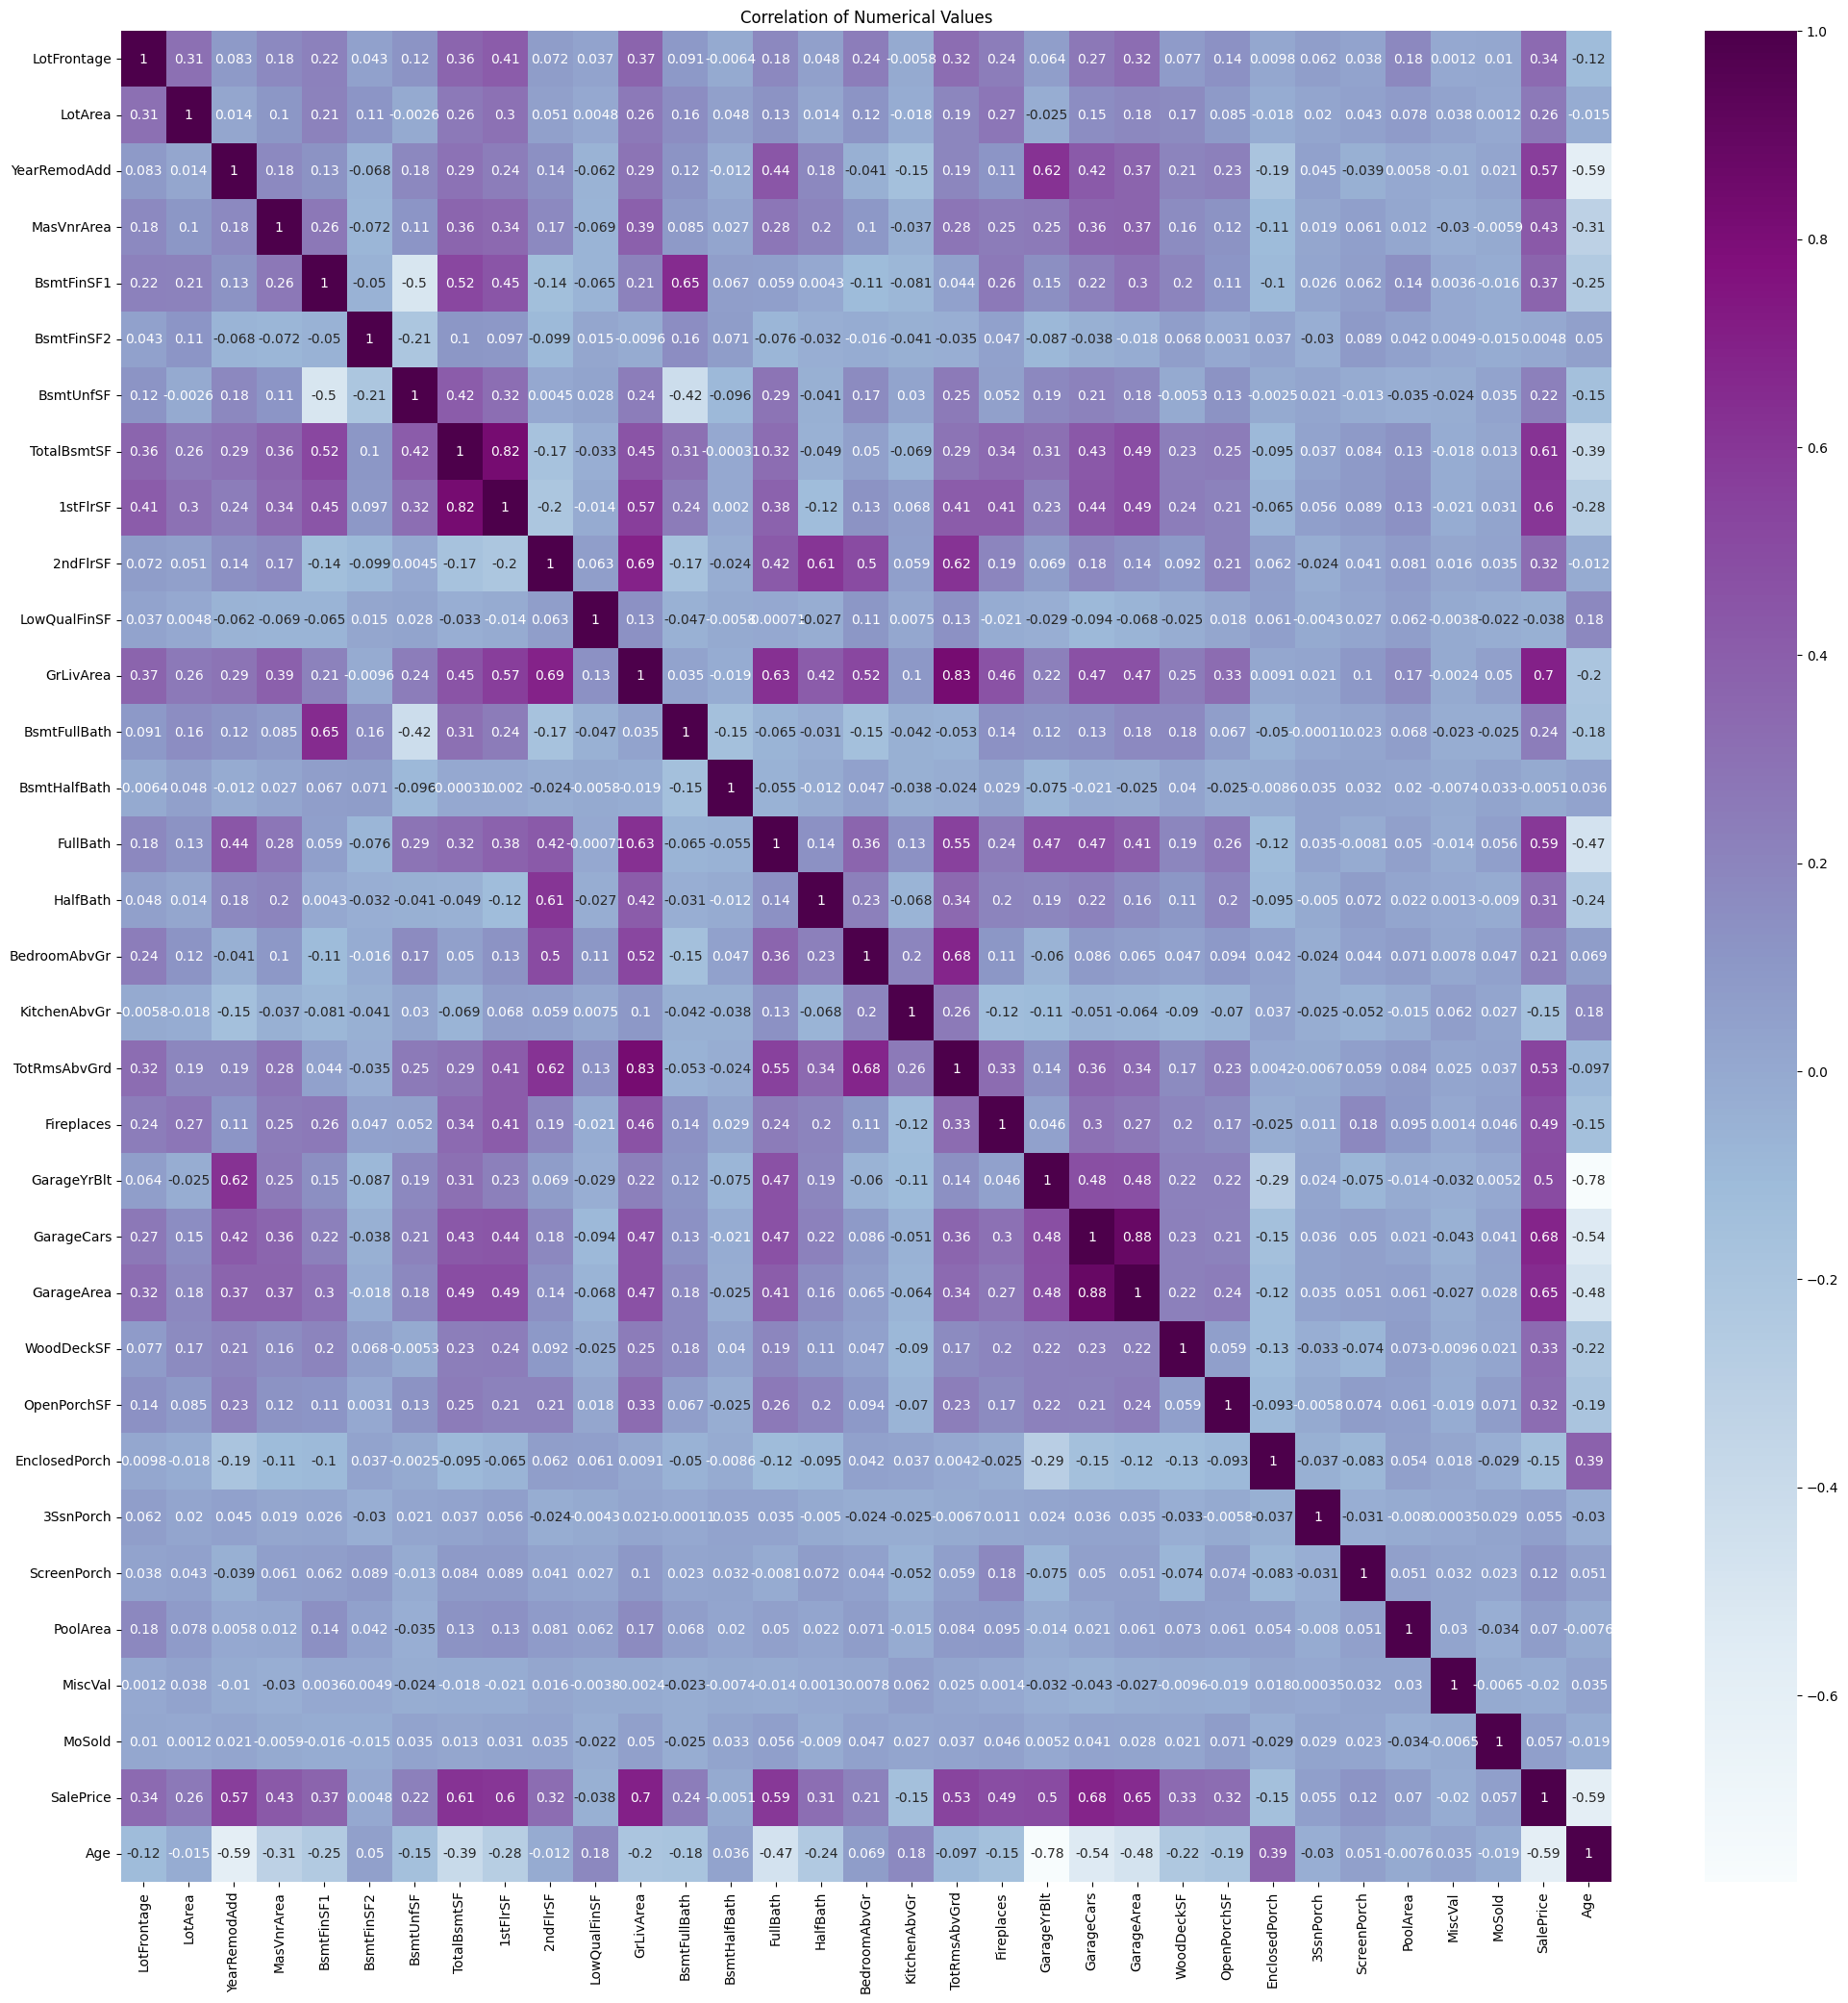

In [73]:
plt.figure(figsize=[25,25])
sns.heatmap(housing.corr(numeric_only=True), annot=True, cmap='BuPu')
plt.title("Correlation of Numerical Values")

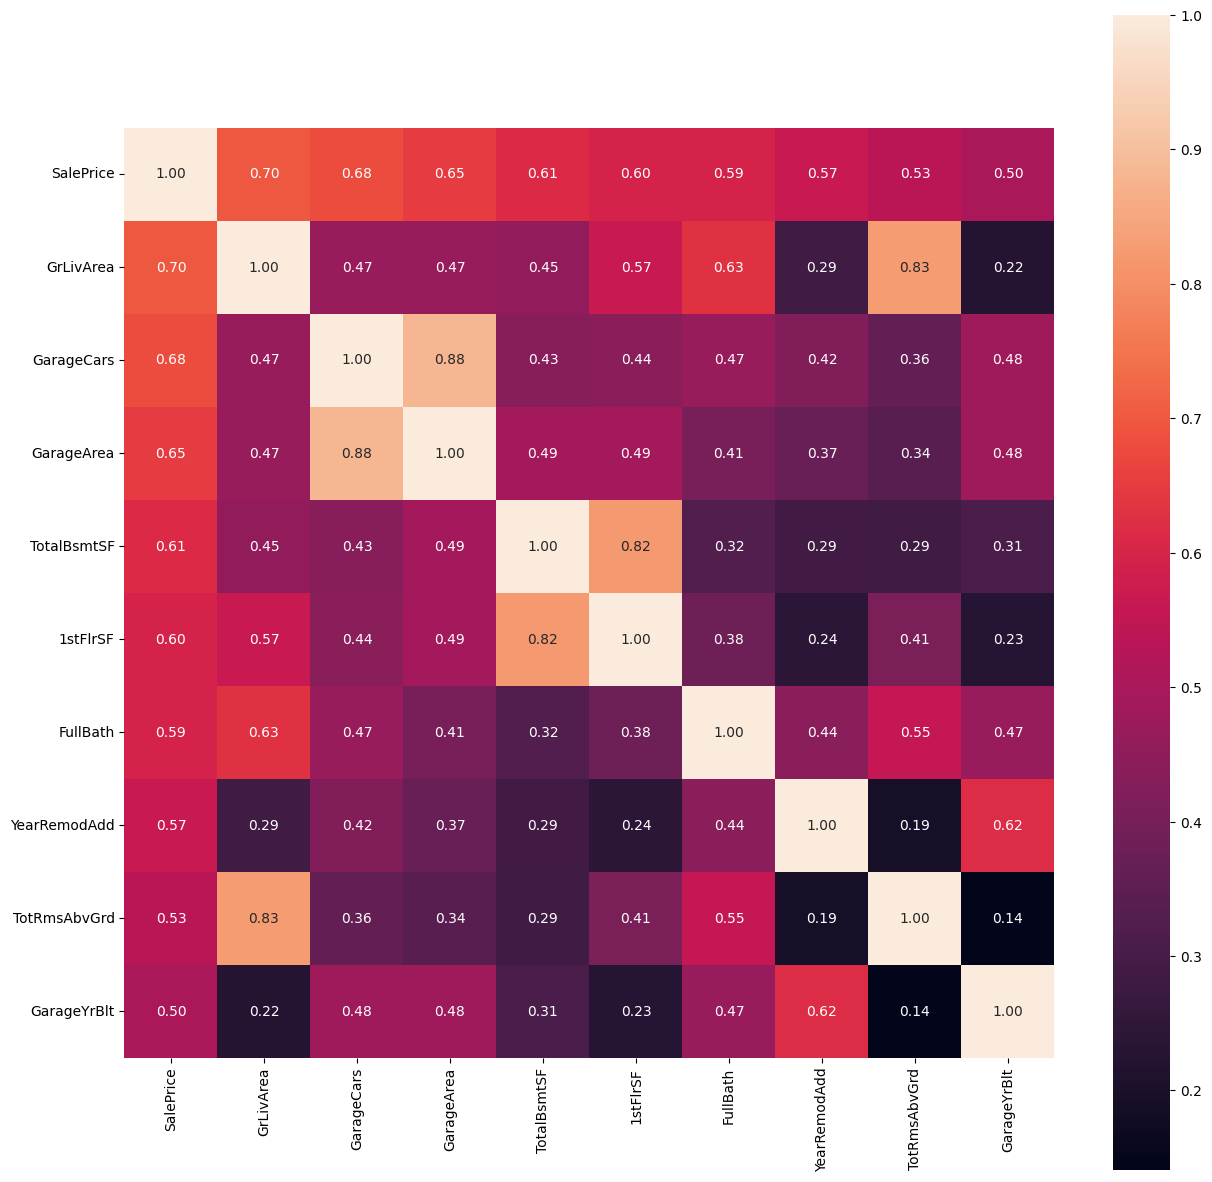

In [74]:
k=10
plt.figure(figsize = [15,15])
cols = housing.corr(numeric_only = True).nlargest(k, "SalePrice").index
cm = np.corrcoef(housing[cols].values.T)
sns.heatmap(cm, annot=True, square=True, fmt = '.2f', cbar=True, annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

###### We can see that 
- GarageArea and GarageCars are highly correlated with coeff of 0.88
- GrLivArea and TotRmsAbvGrd are highly correlated with coeff of 0.83
- TotalBsmtSF and FirstFlrSF are highly correlated with coeff of 0.82

#### PairPLot for Numerical Columns

<Figure size 2000x2000 with 0 Axes>

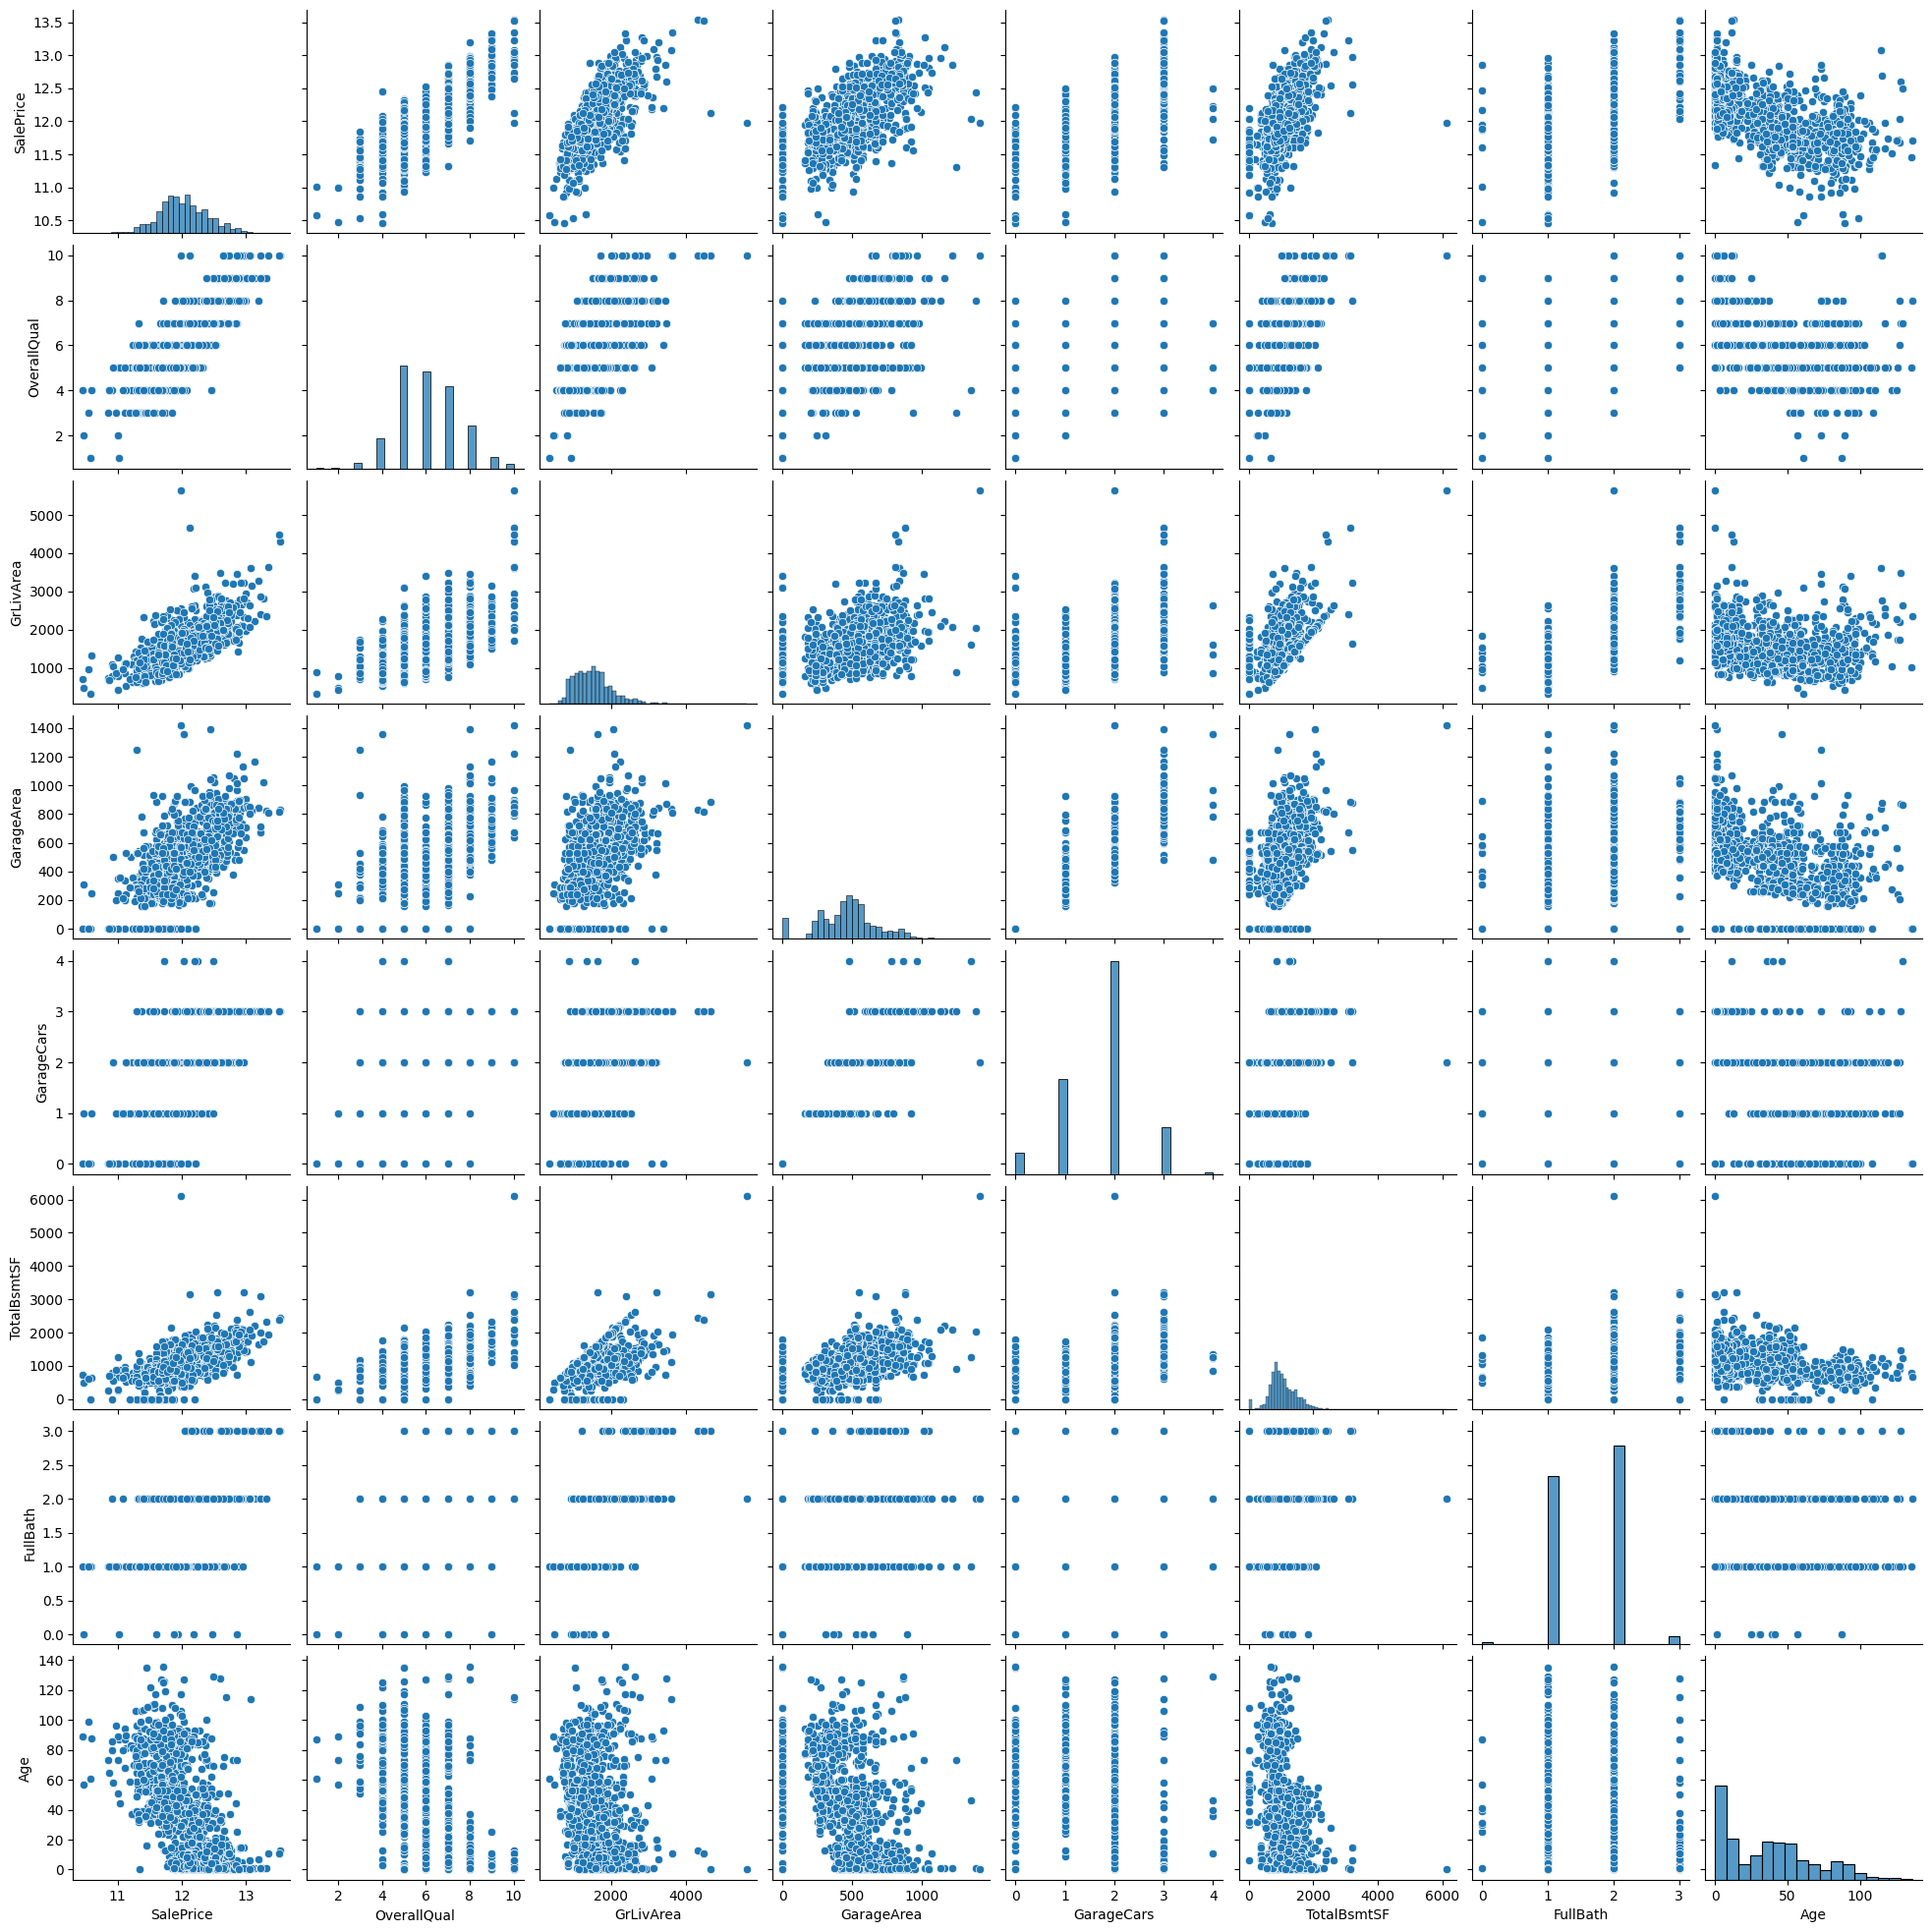

In [76]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars','TotalBsmtSF','FullBath','Age']
plt.figure(figsize=[20,20])
sns.pairplot(housing[cols])
plt.show()

We can see that age has negative correlation with target variable SalePrice and TotalBsmtSF. GrLivArea have positive correlation with SalePrice

## Step 4: Data Preparation

#### Dummy Encoding

In [77]:
housing_num = housing.select_dtypes(include=['int64','float64'])
housing_cat = housing.select_dtypes(include='object')

In [78]:
housing_cat

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
0            60       RL   Pave  None      Reg         Lvl    AllPub   
1            20       RL   Pave  None      Reg         Lvl    AllPub   
2            60       RL   Pave  None      IR1         Lvl    AllPub   
3            70       RL   Pave  None      IR1         Lvl    AllPub   
4            60       RL   Pave  None      IR1         Lvl    AllPub   
5            50       RL   Pave  None      IR1         Lvl    AllPub   
6            20       RL   Pave  None      Reg         Lvl    AllPub   
7            60       RL   Pave  None      IR1         Lvl    AllPub   
8            50       RM   Pave  None      Reg         Lvl    AllPub   
9           190       RL   Pave  None      Reg         Lvl    AllPub   
10           20       RL   Pave  None      Reg         Lvl    AllPub   
11           60       RL   Pave  None      IR1         Lvl    AllPub   
12           20       RL   Pave  None      IR2         Lvl    AllPub   
13           20       RL   Pave  None      IR1         Lvl    AllPub   
14           20       RL   Pave  None      IR1         Lvl    AllPub   
15           45       RM   Pave  None      Reg         Lvl    AllPub   
16           20       RL   Pave  None      IR1         Lvl    AllPub   
17           90       RL   Pave  None      Reg         Lvl    AllPub   
18           20       RL   Pave  None      Reg         Lvl    AllPub   
19           20       RL   Pave  None      Reg         Lvl    AllPub   
20           60       RL   Pave  None      IR1         Lvl    AllPub   
21           45       RM   Pave  Grvl      Reg         Bnk    AllPub   
22           20       RL   Pave  None      Reg         Lvl    AllPub   
23          120       RM   Pave  None      Reg         Lvl    AllPub   
24           20       RL   Pave  None      IR1         Lvl    AllPub   
25           20       RL   Pave  None      Reg         Lvl    AllPub   
26           20       RL   Pave  None      Reg         Lvl    AllPub   
27           20       RL   Pave  None      Reg         Lvl    AllPub   
28           20       RL   Pave  None      IR1         Lvl    AllPub   
29           30       RM   Pave  None      IR1         Lvl    AllPub   
30           70  C (all)   Pave  Pave      Reg         Lvl    AllPub   
31           20       RL   Pave  None      IR1         Lvl    AllPub   
32           20       RL   Pave  None      Reg         Lvl    AllPub   
33           20       RL   Pave  None      IR1         Lvl    AllPub   
34          120       RL   Pave  None      Reg         Lvl    AllPub   
35           60       RL   Pave  None      Reg         Lvl    AllPub   
36           20       RL   Pave  None      Reg         Lvl    AllPub   
37           20       RL   Pave  None      Reg         Lvl    AllPub   
38           20       RL   Pave  None      Reg         Lvl    AllPub   
39           90       RL   Pave  None      Reg         Lvl    AllPub   
40           20       RL   Pave  None      Reg         Lvl    AllPub   
41           20       RL   Pave  None      Reg         Lvl    AllPub   
42           85       RL   Pave  None      IR1         Lvl    AllPub   
43           20       RL   Pave  None      IR1         Lvl    AllPub   
44           20       RL   Pave  None      Reg         Lvl    AllPub   
45          120       RL   Pave  None      Reg         Lvl    AllPub   
46           50       RL   Pave  None      IR1         Lvl    AllPub   
47           20       FV   Pave  None      Reg         Lvl    AllPub   
48          190       RM   Pave  None      Reg         Lvl    AllPub   
49           20       RL   Pave  None      Reg         Lvl    AllPub   
50           60       RL   Pave  None      IR2         Lvl    AllPub   
51           50       RM   Pave  None      Reg         Lvl    AllPub   
52           90       RM   Grvl  None      IR2         Bnk    AllPub   
53           20       RL   Pave  None      IR1         Low    AllPub   
54           80       RL   Pave  None      Re

In [83]:
house = pd.concat([housing_num, housing_cat_dm], axis=1)
house.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0     8450          2003       196.0         706           0   
1         80.0     9600          1976         0.0         978           0   
2         68.0    11250          2002       162.0         486           0   
3         60.0     9550          1970         0.0         216           0   
4         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150          856       856       854             0       1710   
1        284         1262      1262         0             0       1262   
2        434          920       920       866             0       1786   
3        540          756       961       756             0       1717   
4        490         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0             8           0       2003.0           2         548           0   
1             6           1       1976.0           2         460         298   
2             6           1       2001.0           2         608           0   
3             7           1       1998.0           3         642           0   
4             9           1       2000.0           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  SalePrice  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0       2  12.247694    5              0              0              0   
1       5  12.109011   31              0              0              0   
2       9  12.317167    7              0              0              0   
3       2  11.849398   91              0              0              0   
4      12  12.429216    8              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0              0              0               0               0   
1              0              0               0               0   
2              0              0               0               0   
3              0              0               0               0   
4              0              0               0               0   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0               0               0            0            0            1   
1               0               0            0            0            1   
2               0               0            0            0            1   
3               0               0    

In [84]:
house.shape

(1460, 286)

In [85]:
# SPlit into target and feature variables
X = house.drop(['SalePrice'], axis=1).copy()
y = house['SalePrice'].copy()

In [86]:
X.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0     8450          2003       196.0         706           0   
1         80.0     9600          1976         0.0         978           0   
2         68.0    11250          2002       162.0         486           0   
3         60.0     9550          1970         0.0         216           0   
4         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150          856       856       854             0       1710   
1        284         1262      1262         0             0       1262   
2        434          920       920       866             0       1786   
3        540          756       961       756             0       1717   
4        490         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0             8           0       2003.0           2         548           0   
1             6           1       1976.0           2         460         298   
2             6           1       2001.0           2         608           0   
3             7           1       1998.0           3         642           0   
4             9           1       2000.0           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0       2    5              0              0              0              0   
1       5   31              0              0              0              0   
2       9    7              0              0              0              0   
3       2   91              0              0              0              0   
4      12    8              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0            0            0            1            0   
1               0            0            0            1            0   
2               0            0            0            1            0   
3               0  

In [87]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
X_train.shape

(1022, 285)

In [94]:
y_train.shape

(1022,)

##### Scaling the dataset with Standard scaler

In [95]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

In [96]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

#### Building a function to calculate evaluation metrics

In [120]:
def eval_metrics(y_train, y_train_pred, y_test, y_pred):
    # r2 values for train and test data
    print("r2 score (train) = ", '%.2f' % r2_score(y_train, y_train_pred))
    print("r2 score (test) = ", '%.2f' % r2_score(y_test, y_pred))
    
    ## RMSE for train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_train = mse_train ** 0.5
    rmse_test = mse_test ** 0.5
    
    print("RMSE(Train) = ", "%.2f" % rmse_train)
    print("RMSE(Test) = ", "%.2f" % rmse_test)

## Step 5: Build ML Model

In [110]:
# Import ML libs
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [111]:
# Applying Ridge regressing with varing the hyperparameter 'Lambda'
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000]}
ridge = Ridge()
ridgeCV = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1, n_jobs=-1)
ridgeCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
ridgeCV.best_params_

{'alpha': 9.0}

In [102]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.03594074, 0.02940216, 0.02124677, 0.02237129, 0.02064137,
        0.02353725, 0.02904792, 0.02847514, 0.02877684, 0.02729754,
        0.03164983, 0.03422675, 0.03135309, 0.0312499 , 0.02882051,
        0.03329077, 0.03000059, 0.02591643, 0.02568717, 0.02775607,
        0.03601718, 0.02856464, 0.0342711 , 0.0397706 , 0.03063402,
        0.02665186, 0.03150954, 0.02950296]),
 'std_fit_time': array([0.00375411, 0.00899566, 0.00340591, 0.00294398, 0.00283831,
        0.00470507, 0.00549799, 0.00190054, 0.00483566, 0.00323732,
        0.00232281, 0.00752909, 0.00461749, 0.00996137, 0.00516513,
        0.00527386, 0.01157837, 0.00372803, 0.0041359 , 0.00599897,
        0.00700177, 0.00478422, 0.0054649 , 0.01676131, 0.00483855,
        0.00397117, 0.00291181, 0.00299379]),
 'mean_score_time': array([0.009938  , 0.00610719, 0.00532317, 0.00531015, 0.00543408,
        0.01119819, 0.0085362 , 0.00836287, 0.00523891, 0.00952067,
        0.00900421, 0.00775471, 0.010820

In [113]:
ridge = Ridge(alpha=9)

In [114]:
ridge.fit(X_train, y_train)

Ridge(alpha=9)

In [115]:
ridge.coef_

array([-0.00907171,  0.0169559 ,  0.02658183,  0.00071103, -0.00509114,
        0.00889011,  0.00091075, -0.00132158,  0.02957227,  0.04554698,
        0.00742382,  0.06020615,  0.02299427,  0.00160999,  0.0240053 ,
        0.0180985 ,  0.00909467, -0.01985329,  0.02554655,  0.01729447,
       -0.007671  ,  0.04438361,  0.00620544,  0.01368064, -0.00167052,
        0.01063339,  0.00829321,  0.01701303, -0.00492198, -0.00319993,
        0.00527611, -0.05587647, -0.07628154,  0.01122307,  0.00387301,
        0.00610312, -0.02684268,  0.04547065,  0.02073639, -0.00473695,
        0.00671941, -0.00201238, -0.02213566, -0.07987265, -0.02256917,
        0.00215991,  0.04568178,  0.01109441,  0.03555724, -0.01156602,
        0.01108753, -0.01855252,  0.04422608,  0.02317011, -0.04290922,
        0.00086897,  0.07168735,  0.02180462,  0.05458904, -0.01690333,
        0.03185173, -0.03755387, -0.01653223, -0.01423776, -0.01041759,
       -0.00643756, -0.00751861, -0.0026818 ,  0.02612129,  0.03

In [121]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [122]:
eval_metrics(y_train, y_train_pred, y_test, y_pred)

r2 score (train) =  0.92
r2 score (test) =  0.89
RMSE(Train) =  0.11
RMSE(Test) =  0.14


In [119]:
ridgeCV_res = pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.025143      0.005579         0.004182        0.004606      0.0001   
1       0.023640      0.008818         0.006002        0.006291       0.001   
2       0.021130      0.003825         0.004474        0.004310        0.01   
3       0.018303      0.004545         0.009227        0.008157        0.05   
4       0.020784      0.004161         0.006085        0.007452         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.087187          -0.117893          -0.108117   
1   {'alpha': 0.001}          -0.087274          -0.120600          -0.107556   
2    {'alpha': 0.01}          -0.088148          -0.122504          -0.105282   
3    {'alpha': 0.05}          -0.089784          -0.121224          -0.102425   
4     {'alpha': 0.1}          -0.090819          -0.119609          -0.103021   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.093262          -0.102930        -0.101878        0.010831   
1          -0.093738          -0.102421        -0.102318        0.011503   
2          -0.093458          -0.099095        -0.101698        0.011866   
3          -0.093337          -0.094293        -0.100213        0.011291   
4          -0.093933          -0.092759        -0.100028        0.010650   

   rank_test_score  split0_train_score  split1_train_score  \
0               24           -0.059917           -0.052762   
1               26           -0.060002           -0.052846   
2               23           -0.060718           -0.052987   
3               22           -0.062883           -0.053270   
4               21           -0.064472           -0.053540   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.052836           -0.057520           -0.059167   
1           -0.052970           -0.057644           -0.059218   
2           -0.053759           -0.058415           -0.059707   
3           -0.056496           -0.060748           -0.061264   
4           -0.058603           -0.062539           -0.062480   

   mean_train_score  std_train_score  
0         -0.056440         0.003073  
1         -0.056536         0.003058  
2         -0.057117         0.003153  
3         -0.058932         0.003531  
4         -0.060327         0.003892

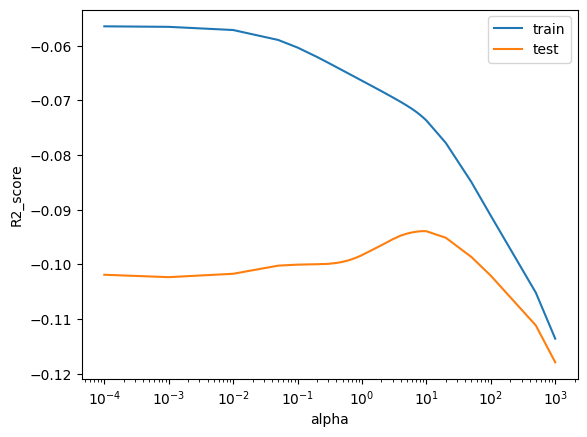

In [123]:
plt.plot(ridgeCV_res['param_alpha'], ridgeCV_res['mean_train_score'], label='train')
plt.plot(ridgeCV_res['param_alpha'], ridgeCV_res['mean_test_score'], label='test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [124]:
# Applying lasso regression with varing the hyperparameter 'Lambda'
lasso = Lasso()
lassoCV = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1, n_jobs=-1)
lassoCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [125]:
lassoCV.best_params_

{'alpha': 0.0001}

In [126]:
lasso = Lasso(alpha=0.0001)

In [127]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [128]:
lasso.coef_

array([ 3.11962331e-03,  1.62304271e-02,  2.34902816e-02,  4.92004108e-03,
        1.18642146e-02,  7.99656429e-03, -0.00000000e+00,  2.31097279e-02,
        3.03916385e-02,  4.28839729e-02,  9.06275415e-03,  5.86032165e-02,
        1.57092793e-02, -2.29132035e-04,  1.65388035e-02,  1.52727708e-02,
        6.64462956e-03, -1.95830536e-02,  1.68459033e-02,  1.49779631e-02,
       -3.60936189e-03,  2.07289547e-02,  2.05113994e-02,  1.20327230e-02,
        1.80323034e-04,  9.83536905e-03,  7.12654167e-03,  1.34874104e-02,
        2.55147899e-01, -4.73940649e-03,  2.63024561e-03, -5.89390138e-02,
       -7.96393555e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.00997323e-02,  2.70218618e-02,  0.00000000e+00, -1.94419580e-02,
        0.00000000e+00, -1.68635672e-02, -0.00000000e+00, -8.52546315e-02,
       -0.00000000e+00, -0.00000000e+00,  1.54993383e-01,  1.06942367e-01,
        1.24907327e-01,  9.69921080e-02,  1.52367922e-03, -1.67013871e-02,
        6.88670616e-02,  

In [129]:
y_train_pred1 = lasso.predict(X_train)
y_pred1 = lasso.predict(X_test)

In [130]:
eval_metrics(y_train, y_train_pred1, y_test, y_pred1)

r2 score (train) =  0.94
r2 score (test) =  0.87
RMSE(Train) =  0.09
RMSE(Test) =  0.15


In [131]:
lassoCV_res = pd.DataFrame(lassoCV.cv_results_)
lassoCV_res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.234527      0.048532         0.013012        0.005395      0.0001   
1       0.058357      0.017298         0.009666        0.001711       0.001   
2       0.028980      0.007530         0.008592        0.003906        0.01   
3       0.025849      0.006219         0.010479        0.004505        0.05   
4       0.016557      0.001579         0.007971        0.002165         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.082505          -0.111877          -0.095098   
1   {'alpha': 0.001}          -0.089921          -0.112925          -0.094944   
2    {'alpha': 0.01}          -0.112691          -0.139874          -0.122627   
3    {'alpha': 0.05}          -0.133794          -0.152806          -0.157166   
4     {'alpha': 0.1}          -0.166562          -0.180952          -0.200826   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.084817          -0.095098        -0.093879        0.010377   
1          -0.086767          -0.088816        -0.094674        0.009514   
2          -0.115889          -0.117024        -0.121621        0.009674   
3          -0.136104          -0.121593        -0.140293        0.013044   
4          -0.165984          -0.150885        -0.173042        0.016836   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.065994           -0.057022   
1                2           -0.083601           -0.069153   
2                3           -0.116754           -0.101892   
3                4           -0.141908           -0.121492   
4                5           -0.175391           -0.158349   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.059025           -0.064065           -0.064238   
1           -0.081048           -0.082222           -0.079862   
2           -0.115300           -0.120182           -0.117074   
3           -0.139835           -0.140829           -0.142441   
4           -0.173856           -0.173207           -0.173595   

   mean_train_score  std_train_score  
0         -0.062069         0.003430  
1         -0.079177         0.005163  
2         -0.114240         0.006376  
3         -0.137301         0.007955  
4         -0.170880         0.006309

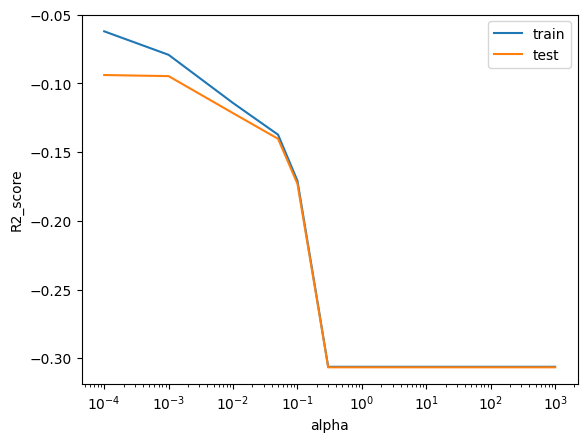

In [132]:
plt.plot(lassoCV_res['param_alpha'], lassoCV_res['mean_train_score'], label='train')
plt.plot(lassoCV_res['param_alpha'], lassoCV_res['mean_test_score'], label='test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()


### Feature Extraction/Elimination

In [133]:
betas = pd.DataFrame(index=X.columns) #convert the columns to a dataframe as betas
betas.rows = X.columns
# Creating columns for Ridge and lasso coefficients against each feature
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

Ridge         Lasso
LotFrontage           -0.009072  3.119623e-03
LotArea                0.016956  1.623043e-02
YearRemodAdd           0.026582  2.349028e-02
MasVnrArea             0.000711  4.920041e-03
BsmtFinSF1            -0.005091  1.186421e-02
BsmtFinSF2             0.008890  7.996564e-03
BsmtUnfSF              0.000911 -0.000000e+00
TotalBsmtSF           -0.001322  2.310973e-02
1stFlrSF               0.029572  3.039164e-02
2ndFlrSF               0.045547  4.288397e-02
LowQualFinSF           0.007424  9.062754e-03
GrLivArea              0.060206  5.860322e-02
BsmtFullBath           0.022994  1.570928e-02
BsmtHalfBath           0.001610 -2.291320e-04
FullBath               0.024005  1.653880e-02
HalfBath               0.018099  1.527277e-02
BedroomAbvGr           0.009095  6.644630e-03
KitchenAbvGr          -0.019853 -1.958305e-02
TotRmsAbvGrd           0.025547  1.684590e-02
Fireplaces             0.017294  1.497796e-02
GarageYrBlt           -0.007671 -3.609362e-03
GarageCars             0.044384  2.072895e-02
GarageArea             0.006205  2.051140e-02
WoodDeckSF             0.013681  1.203272e-02
OpenPorchSF           -0.001671  1.803230e-04
EnclosedPorch          0.010633  9.835369e-03
3SsnPorch              0.008293  7.126542e-03
ScreenPorch            0.017013  1.348741e-02
PoolArea              -0.004922  2.551479e-01
MiscVal               -0.003200 -4.739406e-03
MoSold                 0.005276  2.630246e-03
Age                   -0.055876 -5.893901e-02
MSSubClass_30         -0.076282 -7.963936e-02
MSSubClass_40          0.011223  0.000000e+00
MSSubClass_45          0.003873 -0.000000e+00
MSSubClass_50          0.006103  0.000000e+00
MSSubClass_60         -0.026843 -2.009973e-02
MSSubClass_70          0.045471  2.702186e-02
MSSubClass_75          0.020736  0.000000e+00
MSSubClass_80         -0.004737 -1.944196e-02
MSSubClass_85          0.006719  0.000000e+00
MSSubClass_90         -0.002012 -1.686357e-02
MSSubClass_120        -0.022136 -0.000000e+00
MSSubClass_160        -0.079873 -8.525463e-02
MSSubClass_180        -0.022569 -0.000000e+00
MSSubClass_190         0.002160 -0.000000e+00
MSZoning_FV            0.045682  1.549934e-01
MSZoning_RH            0.011094  1.069424e-01
MSZoning_RL            0.035557  1.249073e-01
MSZoning_RM           -0.011566  9.699211e-02
Street_Pave            0.011088  1.523679e-03
Alley_None            -0.018553 -1.670139e-02
Alley_Pave             0.044226  6.886706e-02
LotShape_IR2           0.023170  2.587325e-02
LotShape_IR3          -0.042909 -0.000000e+00
LotShape_Reg           0.000869  2.659915e-03
LandContour_HLS        0.071687  7.329291e-02
LandContour_Low        0.021805  1.858412e-02
LandContour_Lvl        0.054589  5.572509e-02
Utilities_NoSeWa      -0.016903 -6.922195e-02
LotConfig_CulDSac      0.031852  3.396776e-02
LotConfig_FR2         -0.037554 -4.008033e-02
LotConfig_FR3         -0.016532 -6.577822e-02
LotConfig_Inside      -0.014238 -1.093633e-02
LandSlope_Mod         -0.010418 -1.871475e-02
LandSlope_Sev         -0.006438 -9.014439e-03
Neighborhood_Blueste  -0.007519 -0.000000e+00
Neighborhood_BrDale   -0.002682  0.000000e+00
Neighborhood_BrkSide   0.026121  2.340814e-02
Neighborhood_ClearCr   0.035711  6.177482e-02
Neighborhood_CollgCr  -0.013671 -4.966973e-03
Neighborhood_Crawfor   0.083770  1.063327e-01
Neighborhood_Edwards  -0.062364 -5.006362e-02
Neighborhood_Gilbert  -0.023142 -5.912401e-03
Neighborhood_IDOTRR   -0.029513 -4.779277e-02
Neighborhood_MeadowV  -0.082337 -1.740586e-01
Neighborhood_Mitchel  -0.022357 -1.642716e-02
Neighborhood_NAmes    -0.027668 -2.656487e-02
Neighborhood_NPkVill   0.006862  3.178939e-02
Neighborhood_NWAmes   -0.024504 -2.262970e-02
Neighborhood_NoRidge   0.055279  5.384022e-02
Neighborhood_NridgHt   0.081356  8.390857e-02
Neighborhood_OldTown  -0.028264 -3.907292e-02
Neighborhood_SWISU    -0.020670  0.000000e+00
Neighborhood_Sawyer   -0.022434 -1.096935e-02
Neighborhood_SawyerW  -0.011612 -0.000000e+00
Neighborhood_Somerst   0

In [134]:
# View the features removed by lasso
lasso_cols_removed = list(betas[betas['Lasso']==0].index)
print(lasso_cols_removed)

['BsmtUnfSF', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_75', 'MSSubClass_85', 'MSSubClass_120', 'MSSubClass_180', 'MSSubClass_190', 'LotShape_IR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Condition1_PosA', 'Condition1_RRNe', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'HouseStyle_2.5Fin', 'HouseStyle_SLvl', 'OverallQual_4', 'OverallCond_2', 'OverallCond_4', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'Exterior2nd_Wd Shng', 'ExterCond_Gd', 'ExterCond_Po', 'Foundation_Stone', 'BsmtCond_Po', 'BsmtFinType1_Rec', 'BsmtFinType2_LwQ', 'BsmtFinTy

In [135]:
# View the features removed by lasso
lasso_cols_selected = list(betas[betas['Lasso']!=0].index)
print(lasso_cols_selected)

['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Age', 'MSSubClass_30', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_80', 'MSSubClass_90', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_None', 'Alley_Pave', 'LotShape_IR2', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Nei

In [136]:
print(len(lasso_cols_removed)) # 179 features removed by lasso
print(len(lasso_cols_selected)) # 107 features are selected by lasso

72
213


### Top 10 features significant in predicting the value of a house, both according to Ridge model and Lasso model

In [137]:
# View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9           0.124946
Neighborhood_StoneBr    0.093889
OverallQual_8           0.084829
Neighborhood_Crawfor    0.083770
Exterior1st_BrkFace     0.083020
Neighborhood_NridgHt    0.081356
LandContour_HLS         0.071687
CentralAir_Y            0.070105
OverallCond_9           0.069966
BsmtCond_TA             0.066634
Name: Ridge, dtype: float64

In [138]:
# We have to take inverse log of betas to interpret the ridge coefficient in terms of target variables
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.133088
Neighborhood_StoneBr    1.098437
OverallQual_8           1.088531
Neighborhood_Crawfor    1.087379
Exterior1st_BrkFace     1.086563
Neighborhood_NridgHt    1.084757
LandContour_HLS         1.074319
CentralAir_Y            1.072621
OverallCond_9           1.072471
BsmtCond_TA             1.068905
Name: Ridge, dtype: float64

In [139]:
# View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

PoolQC_None             3.406634
PoolArea                0.255148
OverallQual_9           0.214173
OverallQual_10          0.194622
SaleCondition_Alloca    0.169099
GarageCond_Po           0.163502
SaleType_Oth            0.162157
MSZoning_FV             0.154993
OverallQual_8           0.147071
OverallCond_9           0.136187
Name: Lasso, dtype: float64

In [140]:
# We have to take inverse log of betas to interpret the ridge coefficient in terms of target variables
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

PoolQC_None             30.163538
PoolArea                 1.290652
OverallQual_9            1.238837
OverallQual_10           1.214852
SaleCondition_Alloca     1.184237
GarageCond_Po            1.177628
SaleType_Oth             1.176044
MSZoning_FV              1.167650
OverallQual_8            1.158436
OverallCond_9            1.145896
Name: Lasso, dtype: float64

### Conclusion

Below are the Top 10 features with corresponding coefficients according to Ridge model

- OverallQual_9           1.133088
- Neighborhood_StoneBr    1.098437
- OverallQual_8           1.088531
- Neighborhood_Crawfor    1.087379
- Exterior1st_BrkFace     1.086563
- Neighborhood_NridgHt    1.084757
- LandContour_HLS         1.074319
- CentralAir_Y            1.072621
- OverallCond_9           1.072471
- BsmtCond_TA             1.068905

Below are the Top 10 features with corresponding coefficients according to Lasso model

- PoolQC_None             30.163538
- PoolArea                 1.290652
- OverallQual_9            1.238837
- OverallQual_10           1.214852
- SaleCondition_Alloca     1.184237
- GarageCond_Po            1.177628
- SaleType_Oth             1.176044
- MSZoning_FV              1.167650
- OverallQual_8            1.158436
- OverallCond_9            1.145896

Few Inferences are:
- The price of the house can increase by 1.08 times if the finish of the house is very good
- If the house has centralized AC the price can increase by 1.08 times
- If the basement condition is typical then the house price may increase upto 1.06 times
- The price of the house may increase if the neighbourhood has Crawford, Stone Brook and Northridge Heights as Physical locations

### Optimal value of lambda for Ridge Regression = 9

### Optimal value of lambda for Lasso Regression = 0.001